# Business Analytics - Lumina Technology

Members:
* Sakshi Dilip Channawar, responseible for finding insights and performing t-test
* Darin Engkawong, responsible for finding insights and performing t-test
* Thi Hieu Ngan Tran (Rosa), responsible for finding insights, writing report, running predictive models, developing recommendations.
* Mai Trong Nghia Hoang (Edward), responsible for data exploration/preparation, finding insights, writing report, suggesting recommendations, building predictive models.

# **Part 1 - DATA EXPLORATION AND PREPARATION**

### **A. Data Overview**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Use 'ISO-8859-1' or 'latin1' encoding
data_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')
data_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')

In [3]:
# Merge the data
data = pd.concat([data_2012, data_2013], ignore_index=True)

In [4]:
# Display a few rows of the dataset

data.head(2)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

In [6]:
# Check unique values and their formats in each feature

for col in data.columns:
    uniques = data[col].unique()
    print(col)
    print(uniques)
    print("-" * 50)

accounting_date
[20120509 20120216 20120518 20120109 20120504 20120626 20120605 20120622
 20120403 20120418 20120118 20120117 20120420 20120404 20120423 20120125
 20120427 20120217 20120209 20120319 20120606 20120119 20120210 20120227
 20120521 20120604 20120123 20120220 20120111 20120508 20120522 20120130
 20120619 20120206 20120615 20120621 20120523 20120214 20120208 20120120
 20120202 20120503 20120221 20120302 20120306 20120228 20120301 20120320
 20120307 20120131 20120424 20120224 20120525 20120203 20120502 20120419
 20120124 20120510 20120608 20120326 20120313 20120328 20120305 20120312
 20120517 20120110 20120524 20120412 20120614 20120515 20120201 20120112
 20120207 20120222 20120405 20120501 20120416 20120402 20120213 20120308
 20120323 20120417 20120516 20120607 20120229 20120613 20120215 20120601
 20120330 20120620 20120223 20120507 20120627 20120321 20120315 20120528
 20120314 20120514 20120628 20120531 20120103 20120618 20120625 20120413
 20120411 20120113 20120322 2012032

In [7]:
print("Unique values in:")

for col in data.columns:
    uniques = data[col].value_counts()
    print(f"{col} is: {uniques}")

Unique values in:
accounting_date is: accounting_date
20130430    8132
20120202    5810
20120703    5740
20120403    5713
20130528    5674
            ... 
20130831       2
20130329       1
20130106       1
20120728       1
20120630       1
Name: count, Length: 543, dtype: int64
fiscal_year is: fiscal_year
2013    978202
2012    537030
2014    473150
Name: count, dtype: int64
fiscal_month is: fiscal_month
11    213313
1     194771
2     184176
12    176517
4     166941
9     163786
10    161719
3     160993
8     160699
5     153317
7     139023
6     113127
Name: count, dtype: int64
calendar_year is: calendar_year
2012    1037205
2013     951177
Name: count, dtype: int64
calendar_month is: calendar_month
5     213313
7     194771
8     184176
6     176517
10    166941
3     163786
4     161719
9     160993
2     160699
11    153317
1     139023
12    113127
Name: count, dtype: int64
calendar_day is: calendar_day
5     74578
19    73692
18    73065
13    71833
4     71395
17    70557
2

In [8]:
# Check Statstical Summary of the dataset

data.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,invoice_number,line_number,invoice_date,order_date
count,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,0.0,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06
mean,2.012544e+07,2.012968e+03,6.524841e+00,2.012478e+03,6.398914e+00,1.546221e+01,2.300125e+02,3.817729e+02,5.835392e+00,4.098476e+02,2.638138e+02,2.718023e+01,2.441734e-02,NaN,1.260426e+06,3.612757e-01,2.012544e+07,2.012535e+07
std,5.011222e+03,7.120459e-01,3.620881e+00,4.995319e-01,3.251493e+00,8.684856e+00,1.843121e+02,1.527461e+02,1.888795e+00,2.935179e+03,2.050514e+03,3.294667e+02,1.543410e-01,NaN,1.355150e+06,1.718996e+00,5.011222e+03,5.107654e+03
min,2.012010e+07,2.012000e+03,1.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+00,-7.935420e+05,-1.414695e+05,-4.500000e+04,0.000000e+00,NaN,0.000000e+00,-9.200000e+01,2.012010e+07,2.009033e+07
25%,2.012062e+07,2.012000e+03,3.000000e+00,2.012000e+03,4.000000e+00,8.000000e+00,2.050000e+02,3.000000e+02,5.000000e+00,2.300000e+01,9.381000e+00,2.000000e+00,0.000000e+00,NaN,6.564320e+05,0.000000e+00,2.012062e+07,2.012062e+07
50%,2.012121e+07,2.013000e+03,7.000000e+00,2.012000e+03,6.000000e+00,1.500000e+01,2.050000e+02,4.000000e+02,7.000000e+00,6.750000e+01,3.107000e+01,6.000000e+00,0.000000e+00,NaN,7.496270e+05,0.000000e+00,2.012121e+07,2.012120e+07
75%,2.013062e+07,2.013000e+03,1.000000e+01,2.013000e+03,9.000000e+00,2.300000e+01,2.050000e+02,5.000000e+02,7.000000e+00,1.977000e+02,1.019106e+02,2.000000e+01,0.000000e+00,NaN,2.214222e+06,1.000000e+00,2.013062e+07,2.013062e+07
max,2.013123e+07,2.014000e+03,1.200000e+01,2.013000e+03,1.200000e+01,3.100000e+01,9.500000e+02,7.200000e+02,9.000000e+00,7.935420e+05,7.776692e+05,1.050000e+05,1.000000e+00,NaN,7.003023e+06,4.900000e+01,2.013123e+07,2.013123e+07


In [9]:
data.shape

(1988382, 41)

### **B. Handling Duplicates**

The selected columns for identifying duplicates were chosen based on their role in uniquely defining each transaction:

* invoice_number and line_number: These ensure each invoice and its line items are treated as distinct entries, even within the same invoice.
* customer_code: Differentiates transactions by customer, preventing overlap between invoices associated with different clients.
* item_code: Distinguishes different products or services within the same invoice.
* invoice_date: Ensures that transactions occurring on different dates are treated separately.
* value_sales, value_cost, and value_quantity: Capture the financial details of each transaction, ensuring that differences in sales, costs, or quantities prevent incorrect duplicate identification.

These columns collectively capture the "who," "what," "when," and financial aspects of the transaction, allowing for accurate identification and removal of true duplicates.

In [10]:
# Check for duplicates based on specific columns
duplicate_rows = data.duplicated(subset=["invoice_number", "line_number", "customer_code", 
                                         "item_code", "value_sales", "value_cost", "value_quantity", "invoice_date"])

# Display the number of duplicate rows found & initial shape of  the dataset
print(f"Number of duplicate rows based on selected columns: {duplicate_rows.sum()}")
print(f"Data shape before removing duplicates: {data.shape}")

Number of duplicate rows based on selected columns: 8962
Data shape before removing duplicates: (1988382, 41)


In [11]:
# Remove duplicates based on these columns, keeping the first occurrence
data = data.drop_duplicates(subset=["invoice_number", "line_number", "customer_code", 
                                    "item_code", "value_sales", "value_cost", "value_quantity", "invoice_date"], keep="first")

# Verify the shape of the data after removing duplicates
print(f"Data shape after removing duplicates: {data.shape}")

Data shape after removing duplicates: (1979420, 41)


### **C. Handling Columns with Missing Values or Irrelevant Information**

#### I. Handle Missing Values

In [12]:
# Check for missing values in each feature
missing_values = data.isnull().sum()

print(missing_values)

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

**Item_source_class** presents 100% values being missed within the column. This requires removing them (instead of imputing).

In [13]:
# Drop "item_source_class"

data = data.drop(columns = "item_source_class")

In [14]:
# Re-check datashape, the columns should have 40 now
data.shape

(1979420, 40)

#### II. Handle Irrelevant Information

Columns that might not add value to the analysis or are redundant can be dropped.
* dss_update_time: This is a timestamp for the system's internal update, which might not be relevant to our analysis.
* The calendar_day column: Since we already have complete date information in order_date and invoice_date, calendar_day is redundant and does not provide additional value on its own.

Potential Redundency:
* calendar_year, calendar_month, calendar_day: These are redundant since we already have a combined date field like invoice_date and order_date.
* fiscal_year, fiscal_month: These might also be redundant if we only need one time reference (like the calendar year).

**Retain both fiscal and calendar date fields to cover both operational (order and invoice dates) and financial (fiscal year/month) perspectives for comprehensive analysis.**

In [15]:
# Drop "dss_update_time", "calendar_day" columns

data = data.drop(columns = ["dss_update_time", "calendar_day"])

#### III. Handle Mis-spelling Data & Other Potential Inconsistencies

##### *A) Order Type Codes*

In [16]:
# Check number of unique values in this column

data["order_type_code"].value_counts()

order_type_code
NOR    1608933
EDI     126208
CRR      45732
CRD      43827
PRO      29019
PRD      20842
PUP      19751
NOH      16416
PPO      13213
PMO      12106
CDG      12070
AES       7190
EXP       5773
SPC       5162
NOS       2531
CSH       2044
ZCG       1929
ZCR       1410
COP       1271
MIN        732
5TN        617
CPR        606
PSA        566
EDS        442
CRP        298
PME        242
COA        215
SPL        147
PPD         53
OBS         39
PGS         13
WDC         10
ZOP          5
PM0          4
CSO          2
ZC2          1
ZD3          1
Name: count, dtype: int64

The frequency count shows that PME appears 242 times, while PMO appears 12,106 times. Given the similarity between PME and PMO, it is very likely that PME is a misspelling of PMO. The lower occurrence of PME compared to PMO strongly supports the idea that it is a data entry error.

* PMO appears 12,106 times, and it's listed as a valid order type in the README.
* PM0 (with a zero) appears 4 times, but this is marked as a "Do Not Use" code in the README.
* PME appears 242 times, and it does not exist in the README.

Given this, PME is more likely a typo for PMO (with the letter "O"), rather than PM0 (with a zero), since PMO has significantly higher frequency and is a valid code, while PM0 is marked as "Do Not Use".

In [17]:
# Check total unique values in this column

data["order_type_code"].nunique()

37

In [18]:
# Replace "PME" with "PMO"

data["order_type_code"].replace("PME", "PMO", inplace = True)

In [19]:
# Re-check total unique values in this column

data["order_type_code"].nunique()

36

##### *B) abc_class_volume & abc_class_code*

Labels of these columns in the Metadata (README) match those in the dataset.

In [20]:
data["abc_class_volume"].value_counts()

abc_class_volume
J    1553827
U     196758
E     192390
D      10365
B       8424
A       7022
I       5810
C       2624
H       2108
G         92
Name: count, dtype: int64

In [21]:
data["abc_class_code"].value_counts()

abc_class_code
J    658398
A    291966
D    214960
B    212825
U    196758
G    187964
C    139954
I     43033
E     26532
F      7030
Name: count, dtype: int64

##### *C) Warehouse Codes*

In [22]:
# Check number of unique values in this column

data["warehouse_code"].value_counts()

warehouse_code
5N2    546020
CN0    199251
Unk    196758
5V0    100253
5Q0     88177
5W0     82553
5S0     79843
FA1     68579
1N1     60405
5N1     47507
1N0     42849
V0      40925
FWE     34344
LN9     33304
N0      30565
1V0     30399
1Q0     27952
CS0     22986
Q0      22255
CW0     20941
LV0     20817
1W0     19904
KN0     19734
LQ0     16295
W0      15288
S0      13864
CQ0     11911
1S0      8989
CV0      8650
Q1       7832
5Q1      7740
LW0      7251
5S1      6463
FWA      5279
FW2      4133
FA2      3823
5T0      3736
1Q1      3717
T0       3478
S1       3451
GN0      3411
1S1      2315
LS0      1959
1T0       612
EN0       568
CS1       516
CN1       505
LS1       493
JT0       198
CZ0       108
CT0       105
GW0        98
1T1        96
BB1        95
AS0        65
GS0        30
1N2        14
1N3         9
GQ0         2
Name: count, dtype: int64

**Suggested Actions**
1. Handling Unk: If Unk represents "Unknown," consider either keeping it for cases where the warehouse is genuinely unknown or explore ways to fill this missing information if possible.
2. Inactive Codes (like CN0): Since codes like CN0 are marked as inactive ("NO LONGER ACTIVE"), it might be useful to investigate if they represent outdated data. You can mark them as historical or filter them out, depending on your business needs.

In [23]:
# Check total unique values in this column

data["warehouse_code"].nunique()

59

The following codes are present but were not initially listed in the README:
* 1N2 – 14 occurrences
* 1N3 – 9 occurrences
* BB1 – 95 occurrences

Given the very low frequency of these undocumented codes (1N2, 1N3, and BB1) in a dataset of nearly 2 million rows, it is a reasonable decision to drop them. Their impact on the overall dataset is minimal, and since they are not documented, it's safer to assume they could be erroneous.

In [24]:
# Remove rows with values in warehouse codes that are not in the README

data = data.drop(data[data["warehouse_code"].isin(["1N2", "1N3", "BB1"])].index)

##### *D) Environment Group Codes*

In [25]:
# Check number of unique values in this column

data["environment_group_code"].value_counts()

environment_group_code
C                                 761954
S                                 492555
P                                 446314
R                                 189885
Z                                  87437
D                                    468
I                                    382
NA                                   162
M                                    145
Name: count, dtype: int64

##### *E) Business Area Code*

In [26]:
# Check number of unique values in this column

data["business_area_code"].value_counts()

business_area_code
LMP                               807089
SUR                               402303
COM                               199412
OTH                               186764
DLT                               103225
FLD                                90633
TRO                                33594
TAL                                33033
SAE                                28869
URB                                26849
RWY                                19262
HLB                                18126
PEN                                 8830
LCP                                 6426
980                                 5494
EXL                                 2229
970                                 1451
999                                 1255
940                                 1177
920                                 1003
985                                  671
910                                  505
950                                  418
IAI                                  2

##### *F) Customer District Code*

In [27]:
# Check number of unique values in this column

data["customer_district_code"].value_counts()

customer_district_code
300    428956
200    424709
400    349078
500    178573
600    166870
720     88245
410     72665
210     70189
540     59475
310     34838
530     27665
710     24954
510     24610
535     23176
520      5245
545        48
100         6
Name: count, dtype: int64

In [28]:
# Remove rows with customer district code of 100

data = data.drop(data[data["customer_district_code"] == 100].index)

##### *G) Technology Group Codes*

In [29]:
# Display unique values in this column

print(data["technology_group_code"].unique())
print("--" * 30)

# Calculate total unique values in the feature

print(f"There are {data["technology_group_code"].nunique()} unique values in Technology Group Codes")

['SYLV                                    '
 'NA                                      '
 'PIER                                    ' '96' '219' '92' '214' '380'
 '102' '123' '110' '98' '213' '580' '108' '999' '198'
 'SCHR                                    ' '82' '140' '540'
 'AUST                                    ' '480' '760' '460' '600' '520'
 '998' '570' '280' '330' '220' '415' '340' '225'
 'CSE                                     ' '565' '410' '560' '800' '680'
 '320' '550' '400' '160' '440' '420' '500' '555' '360' '290' '780' '545'
 '181' '240' '640' '820' '595' '300' '830' '70' '850' '86' '720' '740'
 '310' 'FGDFT                                   ' '350' '206' '64'
 'PNZ                                     ' '63'
 'CROM                                    ' '100' '78' '207' '208' '76'
 '211' '205' '85' '90' '68' '130'
 'GLG                                     '
 'INLIT                                   ' '72' '61' '880' '217' '215'
 '80' '210' 'INZ                              

In [30]:
# Create a list containing unexpected Technology Group codes

undocumented_code = ["PHANT", "DIGIN", "114", "112", "128", "88"]

# Check total rows presented in each of the unexpected Technology Group codes in the dataset
for i in undocumented_code:
    print(i)
    print(f" There are {data[data["technology_group_code"] == i].shape[0]} values")
    print("-" * 20)

PHANT
 There are 0 values
--------------------
DIGIN
 There are 0 values
--------------------
114
 There are 1 values
--------------------
112
 There are 1 values
--------------------
128
 There are 185 values
--------------------
88
 There are 2 values
--------------------


In [31]:
# Drop the rows presented in each of the unexpected Technology Group codes in the dataset

data = data.drop(data[data["technology_group_code"].isin(undocumented_code)].index)

In [32]:
data.shape

(1979107, 38)

### **D. Handling Inconsistencies (Categorical and Date Value)**

#### I. Conversion of Data Types

In [33]:
# Convert integer dates to datetime format

data["accounting_date"] = pd.to_datetime(data["accounting_date"], format="%Y%m%d")
data["invoice_date"] = pd.to_datetime(data["invoice_date"], format="%Y%m%d")
data["order_date"] = pd.to_datetime(data["order_date"], format="%Y%m%d")

In [34]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,company_code,customer_code,customer_district_code,item_code,business_area_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date
0,2012-05-09,2012,11,2012,5,101,411800601,410,GENIE8WWWBC,LMP,...,218.40,178.1976,84.0,0,AUD,2217887,1,2012-05-09,2865354,2012-05-09
1,2012-02-16,2012,8,2012,2,101,361000403,300,GENIE8WWWBC,LMP,...,38.28,25.4568,12.0,0,AUD,2185745,1,2012-02-16,2833515,2012-02-16
2,2012-05-09,2012,11,2012,5,101,361000403,300,GENIE8WWWBC,LMP,...,40.20,25.4568,12.0,0,AUD,2217807,1,2012-05-09,2864857,2012-05-08
3,2012-05-18,2012,11,2012,5,101,565540415,500,GENIE8WWWBC,LMP,...,20.10,12.7284,6.0,0,AUD,2222758,1,2012-05-18,2869759,2012-05-18
4,2012-01-09,2012,7,2012,1,101,565540415,500,GENIE8WWWBC,LMP,...,19.14,12.7284,6.0,0,AUD,2170374,1,2012-01-09,2819189,2012-01-09


#### II. Conversions of data in "customer_code" to String & Removal of Leading/Trailing Spaces

Based on overview of unique values, entries in customer_code seem to contain 2 different types of data including String and Integer. Hence, converting the data to string is necessary to ensure consistency for subsequent reference in further analyses.

In [35]:
data["customer_code"] = data["customer_code"].astype(str).str.strip()

In [36]:
# Identify columns that are either objects (strings) or mixed types
string = data.select_dtypes(include=['object']).columns

# List of specific columns you know should be strings and may have leading/trailing spaces
columns = ["item_code", "business_area_code", "item_group_code", 
                    "item_class_code", "bonus_group_code", "environment_group_code", 
                    "technology_group_code", "commission_group_code", "business_chain_l1_code", 
                    "contact_method_code"]

# Apply stripping only to string columns that may have leading/trailing spaces
for col in columns:
    if col in string:
        data[col] = data[col].str.strip()

In [37]:
# Re-Check unique values and their formats in each feature

for col in data.columns:
    uniques = data[col].unique()
    print(col)
    print(uniques)
    print("-" * 50)

accounting_date
<DatetimeArray>
['2012-05-09 00:00:00', '2012-02-16 00:00:00', '2012-05-18 00:00:00',
 '2012-01-09 00:00:00', '2012-05-04 00:00:00', '2012-06-26 00:00:00',
 '2012-06-05 00:00:00', '2012-06-22 00:00:00', '2012-04-03 00:00:00',
 '2012-04-18 00:00:00',
 ...
 '2013-12-31 00:00:00', '2013-12-24 00:00:00', '2013-12-27 00:00:00',
 '2013-12-23 00:00:00', '2013-12-30 00:00:00', '2013-12-22 00:00:00',
 '2013-11-23 00:00:00', '2013-11-16 00:00:00', '2013-07-27 00:00:00',
 '2013-08-31 00:00:00']
Length: 543, dtype: datetime64[ns]
--------------------------------------------------
fiscal_year
[2012 2013 2014]
--------------------------------------------------
fiscal_month
[11  8  7 12 10  9  3  5  6  1  2  4]
--------------------------------------------------
calendar_year
[2012 2013]
--------------------------------------------------
calendar_month
[ 5  2  1  6  4  3  9 11 12  7  8 10]
--------------------------------------------------
company_code
[101 100 140 205 170 220 950 240 

Check categorical columns such as customer_code, item_code, market_segment, etc., are standardised (e.g., no extra spaces or inconsistent values)

#### III. Handling Inconsistencies in "Currency"

In [38]:
# Replace incorrect values
data["currency"] = data["currency"].str.strip().replace({"AUS": "AUD"})

print(data["currency"].value_counts())

currency
AUD    1861774
NZD     116153
USD        675
EUR        503
             2
Name: count, dtype: int64


In [39]:
# Drop 2 rows with empty currency value

data = data.drop(data[data["currency"] == ""].index)

#### IV. Logical Inconsistencies

**Order date should be before the invoice date**

In [40]:
# Ensure invoice_date is after order_date
invalid_dates = data[data['invoice_date'] < data['order_date']]

print(invalid_dates.shape[0])

22


There are 22 rows where invoice dates are before their corresponding order dates. Practically, this is not the case in business and the resulting rows should be removed.

In [41]:
# Drop rows where invoice_date is less than order_date
data.drop(data[data['invoice_date'] < data['order_date']].index, inplace=True)

# Verify the result
print(f"Rows after dropping: {len(data)}")

Rows after dropping: 1979083


#### V. Standardised Currency

In [42]:
data["currency"].unique()

array(['AUD', 'USD', 'NZD', 'EUR'], dtype=object)

In [43]:
data["invoice_date"].min(), data["invoice_date"].max() 

(Timestamp('2012-01-02 00:00:00'), Timestamp('2013-12-31 00:00:00'))

**FX Rates - Reference: S&P Capital IQ, Currency Exchange Rates**

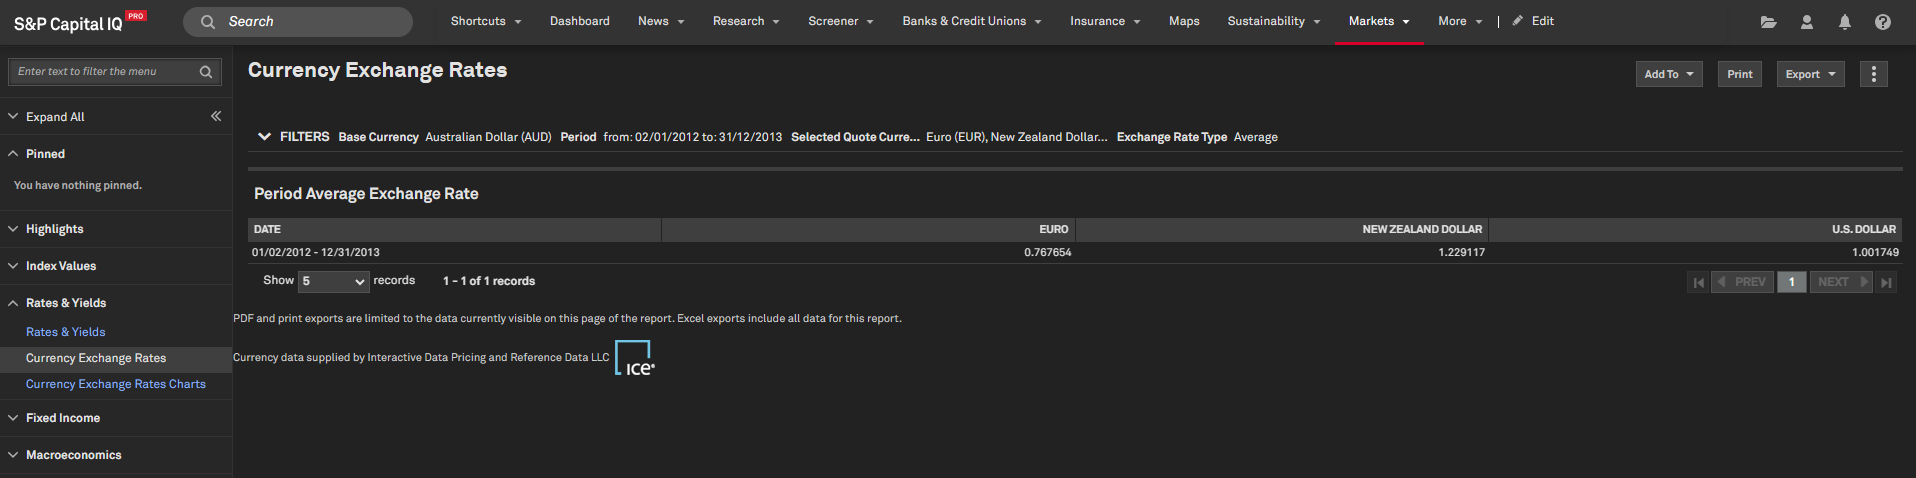

In [45]:
from IPython.display import Image

# Display the image
Image(filename="FX rates.png")

In [46]:
# The average FX rates obtained from S&P Capital IQ
fx_rates = {
    "EUR": 0.767654,  # Euro to AUD average rate
    "NZD": 1.229117,  # NZD to AUD average rate
    "USD": 1.001749   # USD to AUD average rate
}

# Apply the conversion for value_sales in place
data.loc[data["currency"] == "NZD", "value_sales"] *= fx_rates["NZD"]
data.loc[data["currency"] == "USD", "value_sales"] *= fx_rates["USD"]
data.loc[data["currency"] == "EUR", "value_sales"] *= fx_rates["EUR"]

# Apply the conversion for value_cost in place
data.loc[data["currency"] == "NZD", "value_cost"] *= fx_rates["NZD"]
data.loc[data["currency"] == "USD", "value_cost"] *= fx_rates["USD"]
data.loc[data["currency"] == "EUR", "value_cost"] *= fx_rates["EUR"]

In [47]:
# Adjust the "currency" column to AUD only
data['currency'] = 'AUD'

# Check currency column, it should be containing only AUD now
print(data["currency"].unique())

['AUD']


**Insights for Strategic Focus on Order Types**
* These are operational codes that classify the type of order transaction, not specific products.
* The codes help identify normal orders, project orders, returns, price adjustments, and other operational types, helping the company track and manage different kinds of customer transactions.
* “Do Not Use” codes likely represent outdated or special cases, and should be excluded or flagged for review in data analysis, unless they are still contributing significantly to revenue.

**Suggested Actions**
* Focus on high-volume order types like NOR, EDI, PRO, and EXP to drive marketing and sales strategies.
* Review the impact of “Do Not Use” codes to ensure they aren't inadvertently affecting current business operations.

### **E. Handling Outliers**

#### I. Outliers

In [48]:
# Identify numeric columns
num = data.select_dtypes(include=['float64', 'int64']).columns
print(num)

Index(['fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month',
       'company_code', 'customer_district_code', 'item_type', 'value_sales',
       'value_cost', 'value_quantity', 'value_price_adjustment',
       'invoice_number', 'line_number'],
      dtype='object')


In [49]:
print(data["item_type"].unique())

[5 1 7 8 6 4 2 9 3]


In [50]:
print(data["value_price_adjustment"].value_counts())

value_price_adjustment
0    1934436
1      44647
Name: count, dtype: int64


In [51]:
features = data.drop(["fiscal_year", "fiscal_month", "calendar_year", "calendar_month",
                     "company_code", "customer_district_code", "item_type", "invoice_number"], axis = 1)

num = list(features.columns)

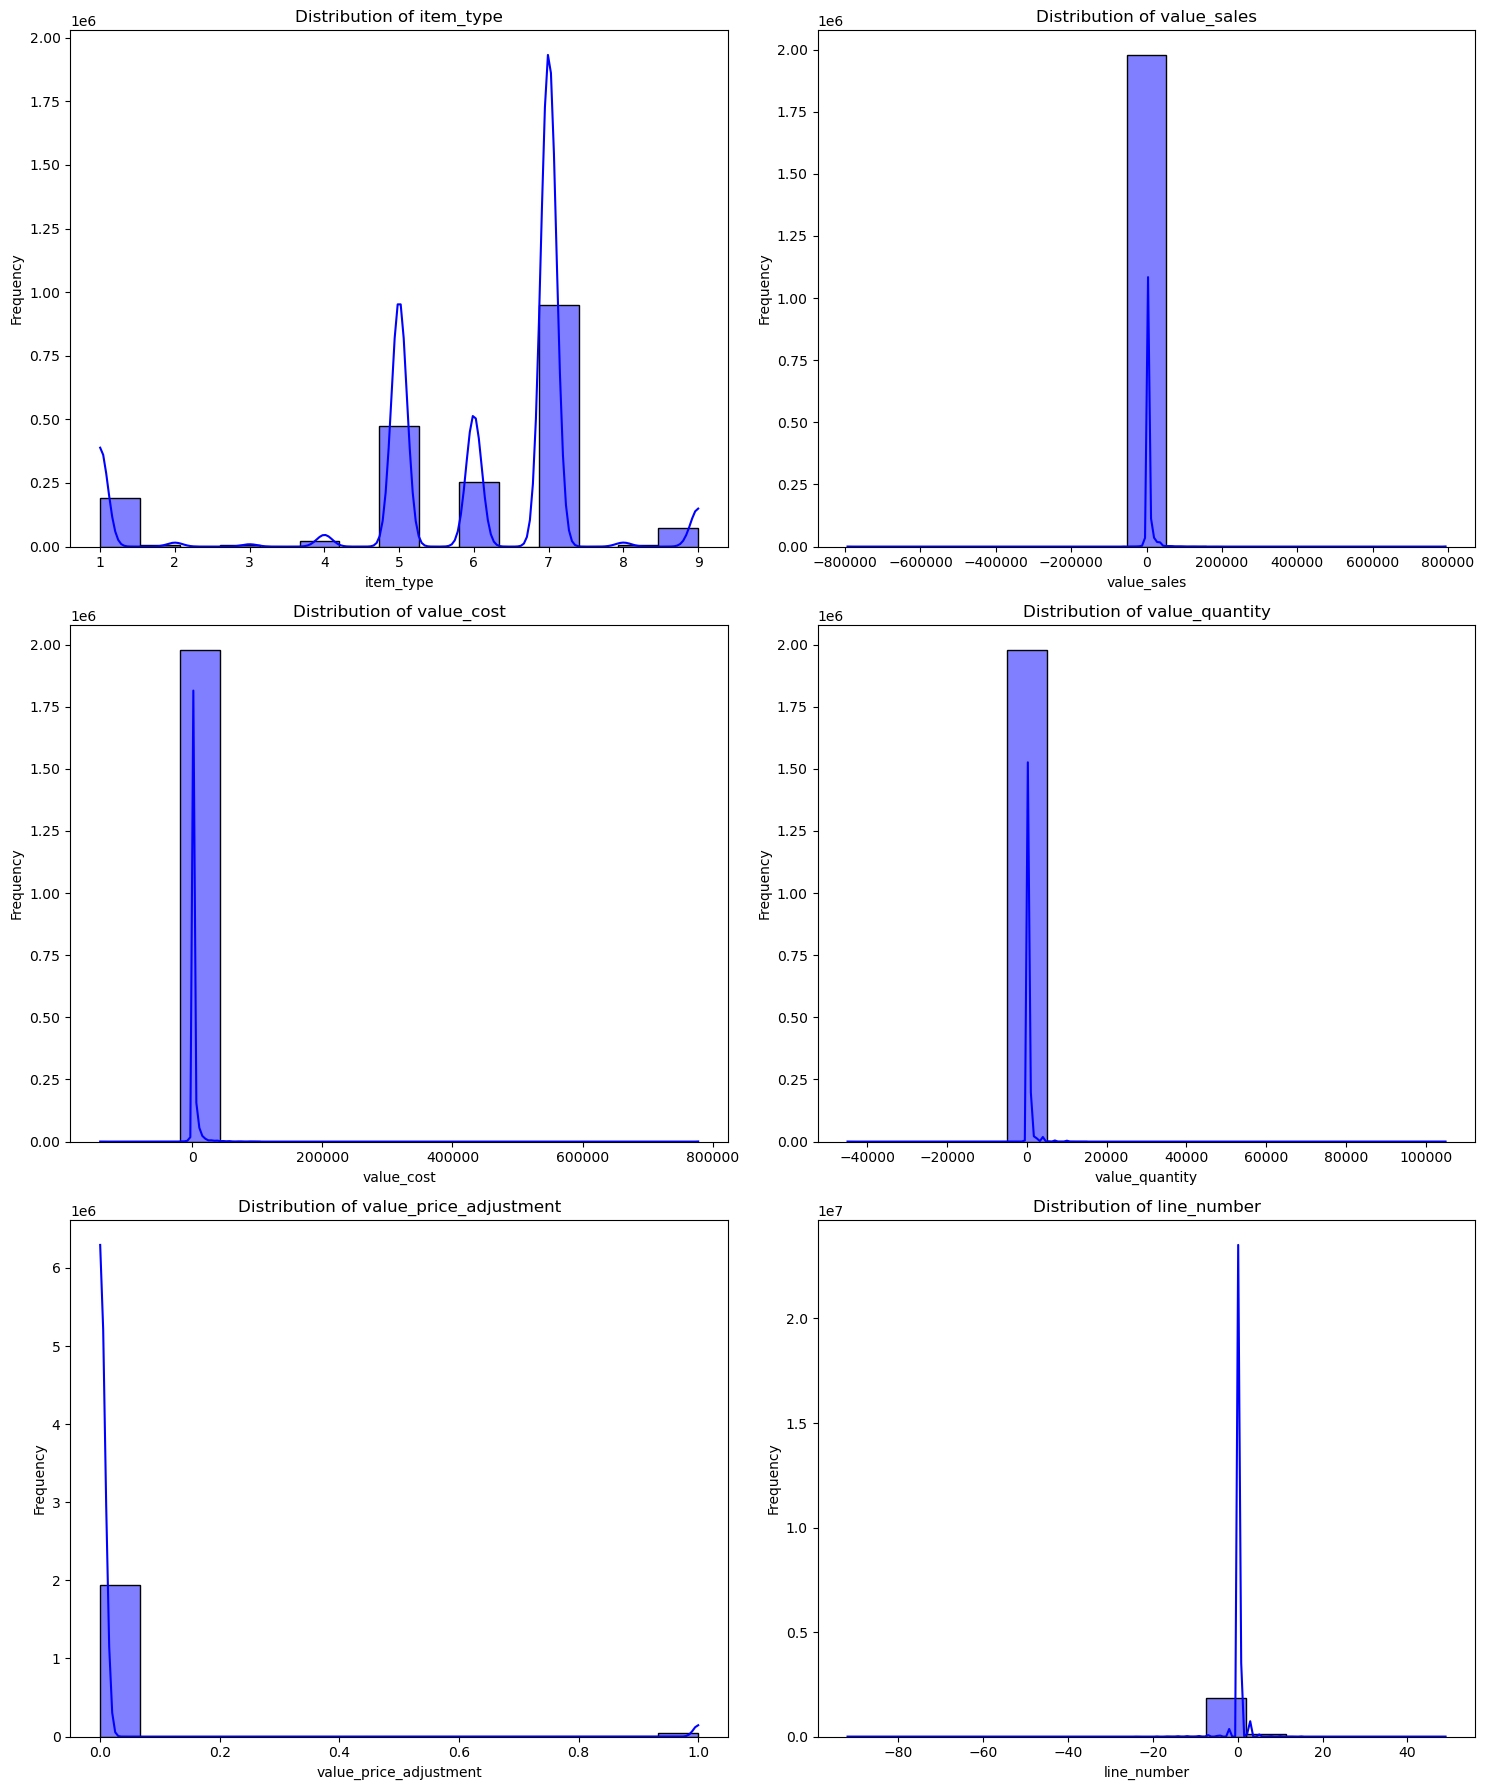

In [52]:
# List of features to plot the distribution (frequency of each data points in each feature)
features = ["item_type", "value_sales", "value_cost", "value_quantity", 
            "value_price_adjustment", "line_number"]

# Flattening the axes array to easily iterate over it
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Looping through each feature and its respective subplot
for i, feature in enumerate(features):
    # Creating a histogram with a KDE line, with specified number of bins and color
    sns.histplot(data[feature], ax=axes[i], kde=True, bins=15, color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [53]:
# Create a list containing values with potential outliers. The focus is on "value_sales", "value_cost", and "value_quantity"
columns = ["value_sales", "value_cost", "value_quantity"]

# Calculate quantiles for each feature
for column in columns:
    Q1 = data[column].quantile(0.25) # Calculating the 1st quartile (25th percentile) for the column
    Q3 = data[column].quantile(0.75) # Calculating the 1st quartile (25th percentile) for the column
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Remove outliers, by assessing each column and only retain rows within (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#### II. Handling Negative Values

a) Negative Values in Normal Order type to be moved to "Return/Refund" category

In [54]:
data["order_type_code"].unique()

array(['NOR', 'EDI', 'CDG', 'CRR', 'PRO', 'EDS', 'CSH', 'PRD', 'CRD',
       'NOS', 'NOH', 'COP', 'MIN', 'EXP', 'OBS', 'COA', 'PSA', 'PPD',
       'WDC', 'PMO', 'CRP', 'CPR', 'PM0', 'ZCG', 'ZCR', 'AES', 'SPC',
       'ZOP', 'ZC2', 'PUP', 'PPO', '5TN', 'ZD3', 'CSO', 'SPL'],
      dtype=object)

In [55]:
# Check and update order type for negative sales values in Normal Orders
data.loc[(data["order_type_code"] == "NOR") & (data["value_sales"] < 0), "order_type_code"] = "CRR"

# Print the updated DataFrame
print(data[data['value_sales'] < 0])

        accounting_date  fiscal_year  fiscal_month  calendar_year  \
61           2012-02-02         2012             8           2012   
176          2012-04-17         2012            10           2012   
220          2012-01-20         2012             7           2012   
253          2012-02-08         2012             8           2012   
286          2012-02-08         2012             8           2012   
...                 ...          ...           ...            ...   
1988179      2013-07-09         2014             1           2013   
1988186      2013-09-09         2014             3           2013   
1988192      2013-09-26         2014             3           2013   
1988205      2013-12-10         2014             6           2013   
1988217      2013-09-17         2014             3           2013   

         calendar_month  company_code customer_code  customer_district_code  \
61                    2           101     267401311                     200   
176          

b) Hanndling Invalid Negative Values

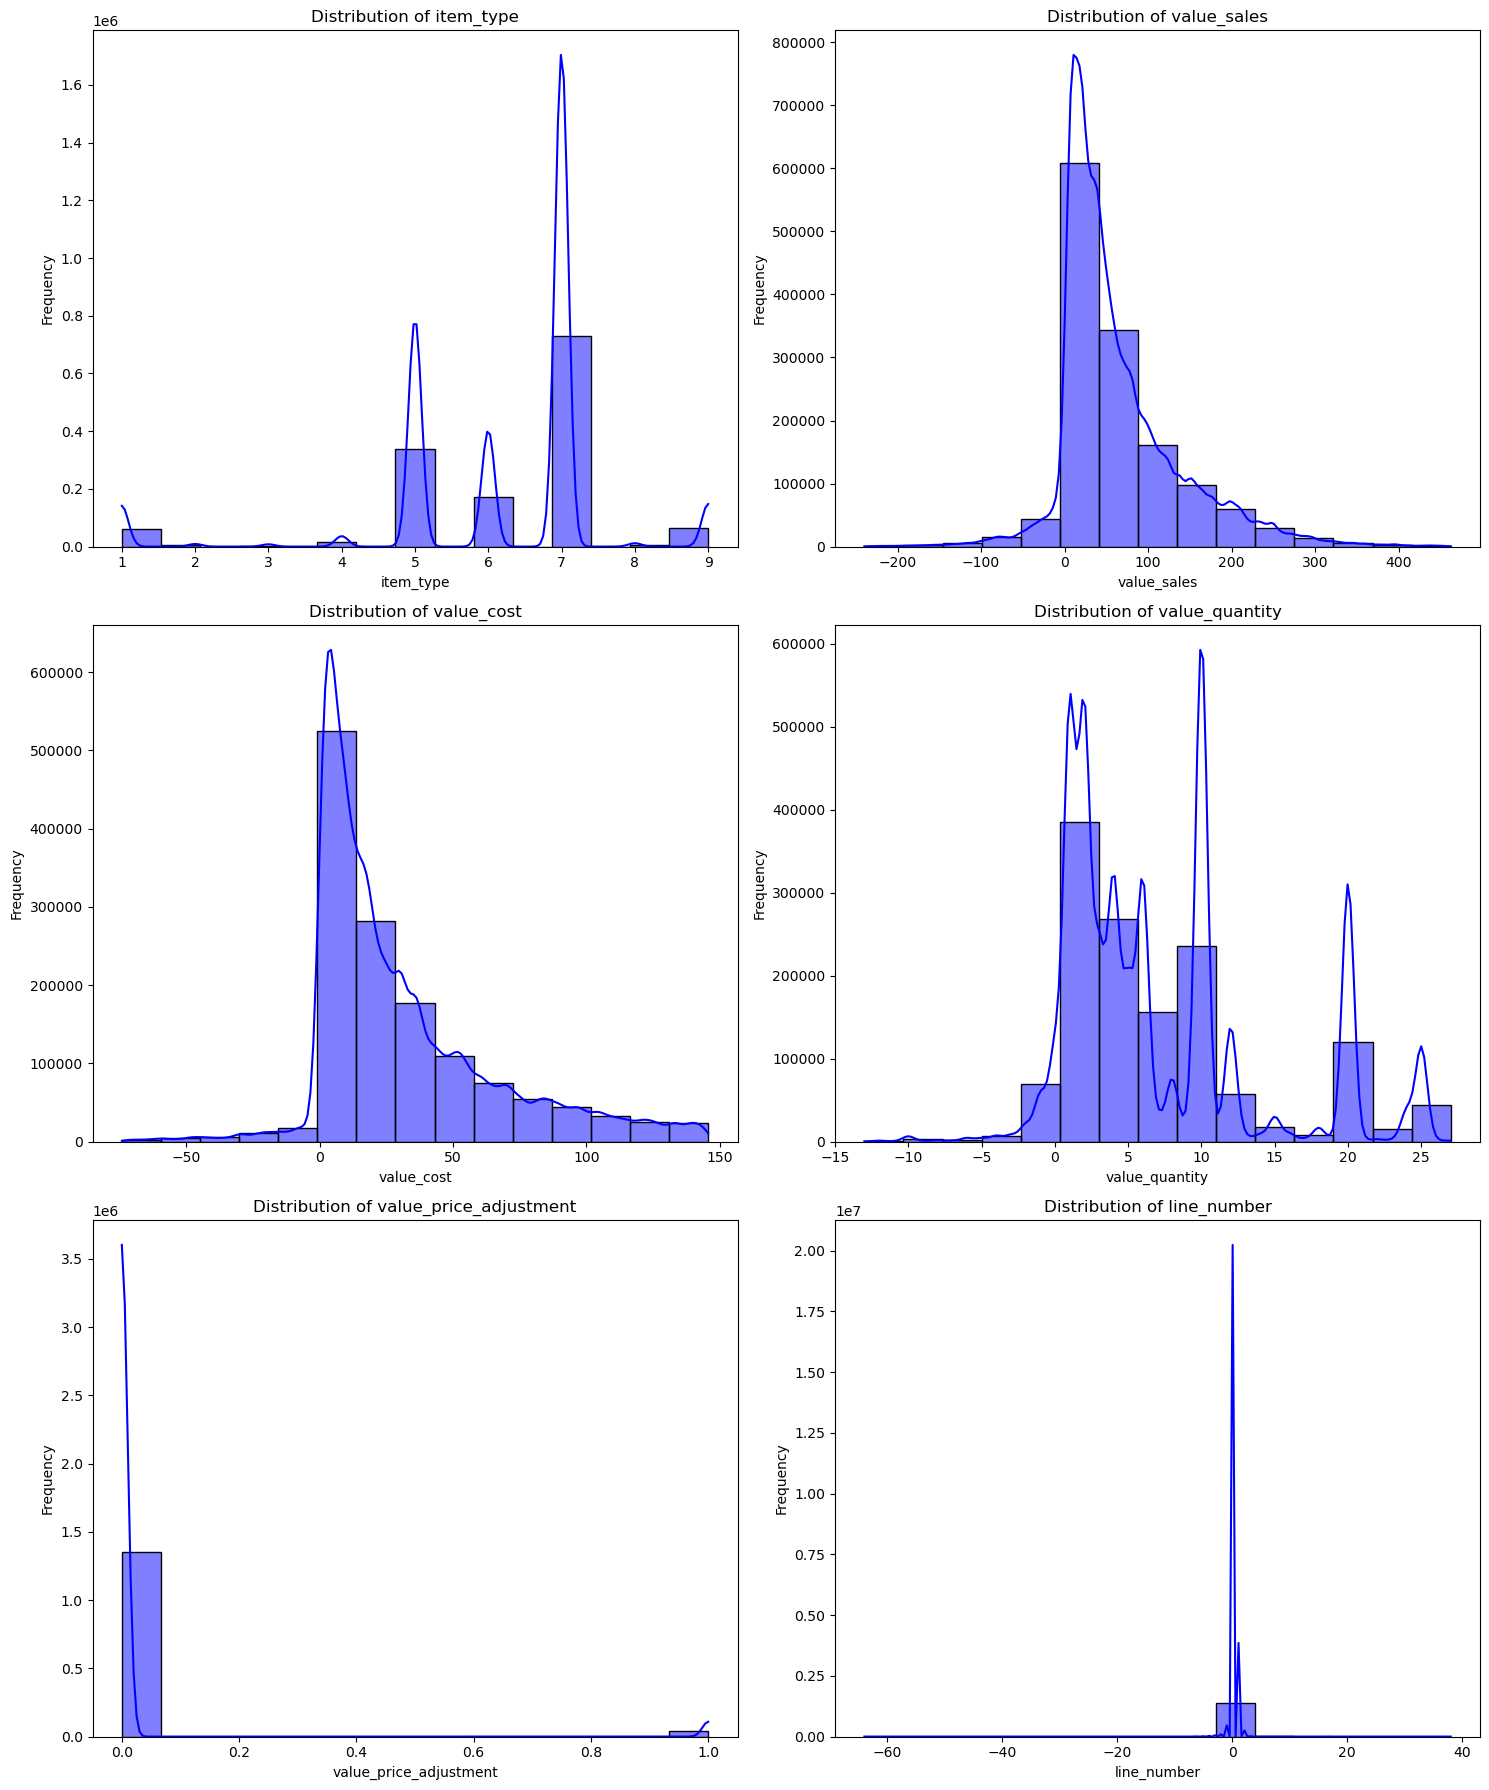

In [56]:
# List of features to plot the distribution (frequency of each data points in each feature)
features = ["item_type", "value_sales", "value_cost", "value_quantity", 
            "value_price_adjustment", "line_number"]

# Flattening the axes array to easily iterate over it
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Looping through each feature and its respective subplot
for i, feature in enumerate(features):
    # Creating a histogram with a KDE line, with specified number of bins and color
    sns.histplot(data[feature], ax=axes[i], kde=True, bins=15, color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [57]:
negative_cost = data.loc[(data["value_cost"] < 0)]

negative_cost.head(5)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,company_code,customer_code,customer_district_code,item_code,business_area_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date
61,2012-02-02,2012,8,2012,2,101,267401311,200,GENIE14WCDLES,LMP,...,-6.38,-4.2428,-2.0,0,AUD,2179885,1,2012-02-02,6121135,2012-02-02
176,2012-04-17,2012,10,2012,4,101,471150200,400,GENIE11WWWES,LMP,...,-3.28,-1.9300,-1.0,0,AUD,2209362,1,2012-04-17,6123288,2012-04-17
220,2012-01-20,2012,7,2012,1,101,471200001,410,GENIE11WCDLES,OTH,...,-2.90,-1.9300,-1.0,0,AUD,2175374,1,2012-01-20,6120866,2012-01-20
253,2012-02-08,2012,8,2012,2,101,361000423,300,GENIE18WCDLBC,LMP,...,-2.90,-1.9300,-1.0,0,AUD,2182334,1,2012-02-08,6121428,2012-02-08
286,2012-02-08,2012,8,2012,2,101,412300504,400,GENIE18WCDLES,LMP,...,-3.19,-2.1200,-1.0,0,AUD,2182337,1,2012-02-08,6121414,2012-02-08


In [58]:
# List of codes that indicate valid refunds, returns, or adjustments
refund_codes = ['CRR', 'CRD', 'COP', 'CPR', 'CRP', 'ZCG', 'ZCR', 'WDC', 'CDG']

# Filter the dataset for rows with invalid negative values (negative but not associated with refund codes)
negative_values = data[(data['value_sales'] < 0) | (data['value_cost'] < 0) | (data['value_quantity'] < 0)]
invalid_negatives = negative_values[~negative_values['order_type_code'].isin(refund_codes)]

# Create the primary cleaned dataset by removing invalid negative rows
data = data.drop(invalid_negatives.index)

# Verify the shape of the cleaned dataset
print(f"Primary dataset after removing invalid negative values: {data.shape}")

Primary dataset after removing invalid negative values: (1389660, 38)


In [59]:
# Filter for rows with only positive values in 'value_sales', 'value_cost', and 'value_quantity'
positive_data = data[(data['value_sales'] > 0) & (data['value_cost'] > 0) & (data['value_quantity'] > 0)]

# Verify the shape of the positive-only dataset
print(f"Positive-only dataset: {positive_data.shape}")

Positive-only dataset: (1289023, 38)


1. Primary Data: Remove invalid negative values to ensure the core dataset is free from erroneous data. This cleaned dataset can be used for most analyses where valid negative values (like returns or refunds) are necessary and provide valuable insights (e.g., profitability, sales trends including returns, or churn analysis).

2. Secondary Dataframe: Only Positive Values. Create a separate dataframe that includes only positive values for cases where negative values (even valid ones like returns) might distort the results.

3. This positive-only dataset will be especially useful for sections where we want to:
* Focus on pure sales without the effect of refunds.
* Build predictive models that should only consider positive sales.

In [60]:
# Save cleaned data to a new CSV
data.to_csv("cleaned_data.csv", index=False)

# **Part 2 - Inference**

Objective is to determine which factors most significantly impact **value sales** across customer segments, project types, and seasonal patterns. Consequently, by understanding these relationships, the management team can refine pricing, promotional strategies, and resource allocation for high-margin segments.

### **A) Seasonal, Project Types, and Customer Segments by Locations**

Project orders are transactions used for project-based customers.

project_order = ["PRO", "PRD", "PMO", "CRP"]

In [59]:
# Categorical columns
categorical_cols = ["customer_district_code", "order_type_code", "calendar_month"]

# One-hot encode categorical columns
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [60]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_210',
       'customer_district_code_300', 'customer_district_code_310',
       'customer_district_code_400', 'customer_district_code_410',
       'customer_district_code_500', 'customer_district_code_510',
       'customer_district_code_520', 'customer_district_code_530',
       'customer_district_code_535', 'customer_district_code_540',
       'customer_district_code_545', 'customer_district_code_600',
       'customer_district_code_710', 'customer_district_code_720',
       'calendar_month_2', 'calendar_month_12',
       'calendar_month_3', 'calendar_month_4', 'calendar_month_5',
       'calendar_month_6', 'calendar_month_7', 'calendar_month_8',
       'calendar_month_9', 'calendar_month_10', 'calendar_month_11']

for i in boo:
    df[i] = df[i].astype(int)

In [61]:
# Create a list contaning codes for "Project Orders"
project_order = ['order_type_code_PRO', 'order_type_code_PRD', 'order_type_code_PMO', 'order_type_code_CRP']

# Create a new column 'is_project_order' that is 1 if any project order code is present, otherwise 0
df['is_project_order'] = df[project_order].max(axis=1)

# Convert "is_project_order" to integer values (originally boolean)
df["is_project_order"] = df["is_project_order"].astype(int)

March

In [62]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_3']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_3']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:20   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

April

In [63]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_4']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_4']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:22   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

May

In [64]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_5']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_5']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:24   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

June

In [65]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_6']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_6']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:25   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

August

In [66]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_8']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_8']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:27   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

September

In [67]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_9']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_9']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:29   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

October

In [68]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_10']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_10']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.559e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:30   Log-Likelihood:            -6.7578e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

November

In [69]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
      'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
       'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_11']

for i in boo:
    df[i] = df[i].astype(int)

# Define target and independent variables
X = df[["value_cost", "value_quantity",
    'customer_district_code_510', 'customer_district_code_520', 'customer_district_code_300',
    'customer_district_code_400', 'order_type_code_PRO', 'order_type_code_PRD', 
    'order_type_code_PMO', 'order_type_code_CRP', 'calendar_month_11']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 5.560e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:32   Log-Likelihood:            -6.7577e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389648   BIC:                         1.352e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Overall

In [70]:
# Define target and independent variables
X = df[["value_cost", "value_quantity", 'is_project_order',
        'customer_district_code_210',
       'customer_district_code_300', 'customer_district_code_310',
       'customer_district_code_400', 'customer_district_code_410',
       'customer_district_code_500', 'customer_district_code_510',
       'customer_district_code_520', 'customer_district_code_530',
       'customer_district_code_535', 'customer_district_code_540',
       'customer_district_code_545', 'customer_district_code_600',
       'customer_district_code_710', 'customer_district_code_720',
       'calendar_month_2', 'calendar_month_12',
       'calendar_month_3', 'calendar_month_4', 'calendar_month_5',
       'calendar_month_6', 'calendar_month_7', 'calendar_month_8',
       'calendar_month_9', 'calendar_month_10', 'calendar_month_11']]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.229e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:39   Log-Likelihood:            -6.7263e+06
No. Observations:             1389660   AIC:                         1.345e+07
Df Residuals:                 1389630   BIC:                         1.345e+07
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables (features) and the dependent variable (target)
X = df[["value_cost", "value_quantity"]]
y = df['value_sales']

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

'''NOTE: Calculating Variance Inflation Factor (VIF) for categorical independent variables in multiple regression analysis is not standard practice, and it generally doesn't make much sense.'''

          Feature       VIF
0           const  2.658525
1      value_cost  1.017172
2  value_quantity  1.017172


"NOTE: Calculating Variance Inflation Factor (VIF) for categorical independent variables in multiple regression analysis is not standard practice, and it generally doesn't make much sense."

In [72]:
data.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date'],
      dtype='object')

In [73]:
df = data.copy()

In [74]:
df["abc_class_code"].unique()

array(['J', 'B', 'D', 'E', 'C', 'I', 'F', 'A', 'U', 'G'], dtype=object)

In [75]:
df["value_cost"]

1           25.4568
2           25.4568
3           12.7284
4           12.7284
5           12.7284
             ...   
1988375    103.0000
1988376     26.3900
1988377    105.5600
1988380     13.1950
1988381     14.2100
Name: value_cost, Length: 1389660, dtype: float64

In [76]:
total_sales_value = df["value_cost"].sum()

total_sales_value

42766451.39865448

In [77]:
# Assuming df is already loaded with the data
total_count = len(df)
total_cost = df["value_cost"].sum()

# Group by 'abc_class_code' and calculate the required aggregates
abc_summary = df.groupby('abc_class_code').agg(
    count=('abc_class_code', 'size'),
    cost=("value_cost", 'sum')  # Aggregate total cost
).reset_index()

# Calculate line item percentage and usage value percentage
abc_summary['line_item_percentage'] = (abc_summary['count'] / total_count) * 100
abc_summary['usage_value_percentage'] = (abc_summary["cost"] / total_cost) * 100  # Use "sales_value" here

In [78]:
# Output the results
print("Line Item Percentage:\n", abc_summary['line_item_percentage'])
print("Usage Value Percentage:\n", abc_summary['usage_value_percentage'])

Line Item Percentage:
 0    14.575220
1    11.812458
2     7.559691
3    12.553862
4     1.440424
5     0.158888
6    12.235007
7     2.167437
8    27.959645
9     9.537369
Name: line_item_percentage, dtype: float64
Usage Value Percentage:
 0    15.135700
1    10.683256
2     5.430760
3    10.014024
4     1.375538
5     0.318944
6    13.072673
7     2.344557
8    31.969857
9     9.654690
Name: usage_value_percentage, dtype: float64


In [79]:
# Output the results
print("Line Item Percentage:\n", abc_summary['line_item_percentage'])
print("Usage Value Percentage:\n", abc_summary['usage_value_percentage'])

Line Item Percentage:
 0    14.575220
1    11.812458
2     7.559691
3    12.553862
4     1.440424
5     0.158888
6    12.235007
7     2.167437
8    27.959645
9     9.537369
Name: line_item_percentage, dtype: float64
Usage Value Percentage:
 0    15.135700
1    10.683256
2     5.430760
3    10.014024
4     1.375538
5     0.318944
6    13.072673
7     2.344557
8    31.969857
9     9.654690
Name: usage_value_percentage, dtype: float64


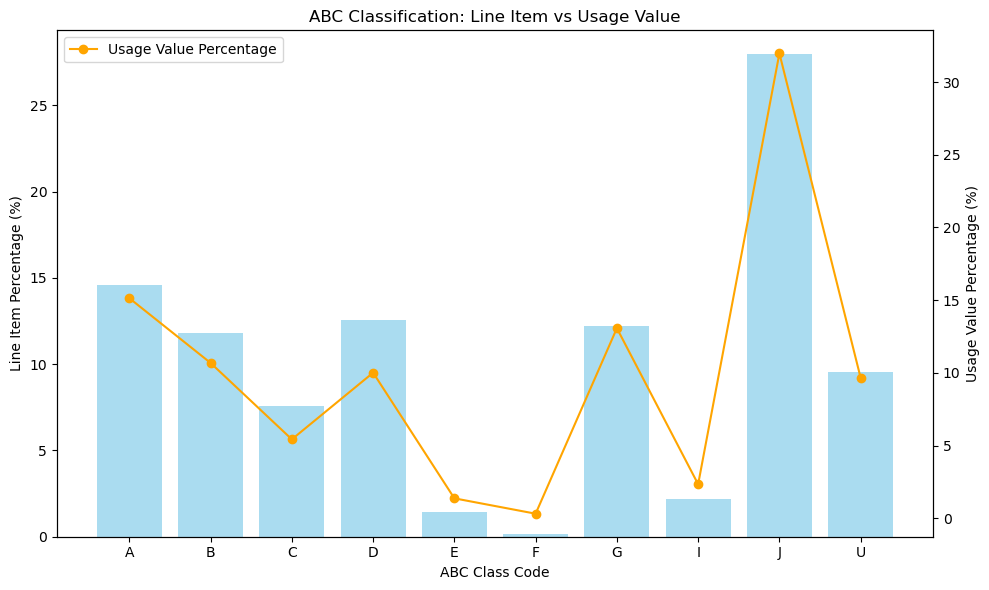

In [80]:
# Plot Line Item Percentage as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(abc_summary['abc_class_code'], abc_summary['line_item_percentage'], color='skyblue', alpha=0.7, label='Line Item Percentage')
plt.xlabel('ABC Class Code')
plt.ylabel('Line Item Percentage (%)')
plt.title('ABC Classification: Line Item vs Usage Value')

# Plot Usage Value Percentage as a line chart on a secondary y-axis
plt.twinx()
plt.plot(abc_summary['abc_class_code'], abc_summary['usage_value_percentage'], color='orange', marker='o', label='Usage Value Percentage')
plt.ylabel('Usage Value Percentage (%)')

# Show plot with legends
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### **B) Factors Affecting Value Sales in Areas (Highest vs. Lowest Sales), based on Value Sales**

In [81]:
# Filter for high-performing district
df_200 = data[data['customer_district_code'] == 200]
df_300 = data[data['customer_district_code'] == 300]
df_400 = data[data['customer_district_code'] == 400]
df_600 = data[data['customer_district_code'] == 600]
df_720 = data[data['customer_district_code'] == 720]

# Filter for low-performing district
df_510 = data[data['customer_district_code'] == 510]
df_520 = data[data['customer_district_code'] == 520]
df_535 = data[data['customer_district_code'] == 535]
df_545 = data[data['customer_district_code'] == 545]

#### I. Investigating Factors affecting Sales in Customer District 200

In [82]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_200, columns=categorical_cols, drop_first=True)

In [83]:
print(list(df_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_c

In [84]:
# Convert boolean values (resulting from encoding) to integer values
boo =['business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_CDG', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_CSO', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 'technology_group_code_210', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_250', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_63', 'technology_group_code_64', 'technology_group_code_68', 'technology_group_code_680', 'technology_group_code_72', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_780', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_999', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_FGDFT', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [85]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
      'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_CDG', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_CSO', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 'technology_group_code_210', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_250', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_63', 'technology_group_code_64', 'technology_group_code_68', 'technology_group_code_680', 'technology_group_code_72', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_780', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_999', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_FGDFT', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 1.306e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:59   Log-Likelihood:            -1.4748e+06
No. Observations:              312522   AIC:                         2.950e+06
Df Residuals:                  312375   BIC:                         2.951e+06
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

After Removing Insignificant Variables

In [86]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
       'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_RWY', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_CDG', 'order_type_code_COA', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH','order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_130', 'technology_group_code_181', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 'technology_group_code_210', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_250', 'technology_group_code_280', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_330', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_61', 'technology_group_code_63', 'technology_group_code_64', 'technology_group_code_68', 'technology_group_code_680', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_780', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_85', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_999', 'technology_group_code_CROM', 'technology_group_code_FGDFT', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:05   Log-Likelihood:            -1.4750e+06
No. Observations:              312522   AIC:                         2.950e+06
Df Residuals:                  312403   BIC:                         2.952e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### II. Investigating Factors affecting Sales in Customer District 300

In [87]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_300, columns=categorical_cols, drop_first=True)

In [88]:
print(list(df_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_c

In [89]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'order_type_code_WDC', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_350', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_82', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_AUST', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [90]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
                'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'order_type_code_WDC', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_350', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_82', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_AUST', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.459e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:17   Log-Likelihood:            -1.4489e+06
No. Observations:              308580   AIC:                         2.898e+06
Df Residuals:                  308446   BIC:                         2.899e+06
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### III. Investigating Factors affecting Sales in Customer District 400

In [91]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_400, columns=categorical_cols, drop_first=True)

In [92]:
print(list(df_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_c

In [93]:
# Convert boolean values (resulting from encoding) to integer values
boo = ['business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 
       'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 
       'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 
       'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 
       'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 
       'business_area_code_URB', 
       'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 
       'order_type_code_CSH', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_EXP', 'order_type_code_MIN', 'order_type_code_NOH', 
       'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 
       'order_type_code_PUP', 
       'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 
       'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 
       'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 
       'environment_group_code_Z', 
       'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_123', 
       'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 
       'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 
       'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 
       'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 
       'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 
       'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_340', 'technology_group_code_350', 
       'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_420', 
       'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 
       'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 
       'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 
       'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 
       'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_72', 
       'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 
       'technology_group_code_78', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_830', 
       'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 
       'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_CROM', 
       'technology_group_code_CSE', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 
       'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [94]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
                'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 
       'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 
       'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 
       'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 
       'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 
       'business_area_code_URB', 
       'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 
       'order_type_code_CSH', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_EXP', 'order_type_code_MIN', 'order_type_code_NOH', 
       'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PMO', 'order_type_code_PRD', 'order_type_code_PRO', 
       'order_type_code_PUP', 
       'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 
       'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 
       'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 
       'environment_group_code_Z', 
       'technology_group_code_102', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_123', 
       'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 
       'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_208', 
       'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 
       'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 
       'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 
       'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_340', 'technology_group_code_350', 
       'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_420', 
       'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 
       'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 
       'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 
       'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 
       'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_72', 
       'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 
       'technology_group_code_78', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_830', 
       'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 
       'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_CROM', 
       'technology_group_code_CSE', 'technology_group_code_GLG', 'technology_group_code_INLIT', 'technology_group_code_NA', 
       'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:32   Log-Likelihood:            -1.2324e+06
No. Observations:              260035   AIC:                         2.465e+06
Df Residuals:                  259898   BIC:                         2.466e+06
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### IV. Investigating Factors affecting Sales in Customer District 720 (Intercompany Sales)

In [95]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_720, columns=categorical_cols, drop_first=True)

In [96]:
print(list(df_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_945', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_c

In [97]:
# Convert boolean values (resulting from encoding) to integer values
boo =['business_area_code_945', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_COP', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_EXP', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_PMO', 'order_type_code_PPO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'order_type_code_SPC', 'order_type_code_ZCR', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_250', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_340', 'technology_group_code_350', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_410', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_680', 'technology_group_code_70', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_780', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_820', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_998', 'technology_group_code_999', 'technology_group_code_AUST', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_DIGIN', 'technology_group_code_GLG', 'technology_group_code_INZ', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [98]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
      'business_area_code_945', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_COP', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_EXP', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_PMO', 'order_type_code_PPO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'order_type_code_SPC', 'order_type_code_ZCR', 'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_160', 'technology_group_code_181', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_211', 'technology_group_code_213', 'technology_group_code_214', 'technology_group_code_217', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225', 'technology_group_code_240', 'technology_group_code_250', 'technology_group_code_280', 'technology_group_code_290', 'technology_group_code_300', 'technology_group_code_310', 'technology_group_code_320', 'technology_group_code_330', 'technology_group_code_340', 'technology_group_code_350', 'technology_group_code_360', 'technology_group_code_380', 'technology_group_code_400', 'technology_group_code_410', 'technology_group_code_415', 'technology_group_code_420', 'technology_group_code_440', 'technology_group_code_460', 'technology_group_code_480', 'technology_group_code_500', 'technology_group_code_520', 'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_550', 'technology_group_code_555', 'technology_group_code_560', 'technology_group_code_565', 'technology_group_code_570', 'technology_group_code_580', 'technology_group_code_595', 'technology_group_code_600', 'technology_group_code_61', 'technology_group_code_64', 'technology_group_code_640', 'technology_group_code_68', 'technology_group_code_680', 'technology_group_code_70', 'technology_group_code_720', 'technology_group_code_740', 'technology_group_code_76', 'technology_group_code_760', 'technology_group_code_78', 'technology_group_code_780', 'technology_group_code_800', 'technology_group_code_82', 'technology_group_code_820', 'technology_group_code_830', 'technology_group_code_85', 'technology_group_code_850', 'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_998', 'technology_group_code_999', 'technology_group_code_AUST', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_DIGIN', 'technology_group_code_GLG', 'technology_group_code_INZ', 'technology_group_code_NA', 'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1480.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:41   Log-Likelihood:            -1.0661e+05
No. Observations:               24796   AIC:                         2.135e+05
Df Residuals:                   24659   BIC:                         2.146e+05
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**After Remove Insignificant Variables**

In [99]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
       'business_area_code_970', 'business_area_code_980', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'order_type_code_COP', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_EXP', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_SPC', 'order_type_code_ZCR', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 'technology_group_code_130', 'technology_group_code_198', 'technology_group_code_206', 'technology_group_code_207', 'technology_group_code_219', 'technology_group_code_225', 'technology_group_code_310','technology_group_code_330', 'technology_group_code_340', 'technology_group_code_360', 'technology_group_code_500', 'technology_group_code_545', 'technology_group_code_580', 'technology_group_code_61', 'technology_group_code_68','technology_group_code_70', 'technology_group_code_76', 'technology_group_code_85', 'technology_group_code_86', 'technology_group_code_92', 'technology_group_code_96', 'technology_group_code_98', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_DIGIN', 'technology_group_code_GLG', 'technology_group_code_INZ', 'technology_group_code_NA', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2926.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:45   Log-Likelihood:            -1.0677e+05
No. Observations:               24796   AIC:                         2.137e+05
Df Residuals:                   24727   BIC:                         2.142e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### V. Investigating Factors affecting Sales in Customer District 545

In [100]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_545, columns=categorical_cols, drop_first=True)

In [101]:
df_encoded.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'item_group_code',
       'item_class_code', 'item_type', 'bonus_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'business_chain_l1_code',
       'business_chain_l1_name', 'contact_method_code', 'salesperson_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'business_area_code_LMP', 'business_area_code_OTH',
       'business_area_code_RWY', 'business_area_code_SUR',
       'order_type_code_COP', 'order_type_code_CRP', 'order_type_code_CSH',
       'order_type_code_NOR', 'order_type_code_ZCR', 'abc_class_volume_J',
       'environment_group_code_S', 'enviro

In [102]:
# Convert boolean values (resulting from encoding) to integer values
boo =['business_area_code_LMP',
       'business_area_code_OTH', 'business_area_code_RWY',
       'business_area_code_SUR', 'order_type_code_COP', 'order_type_code_CRP',
       'order_type_code_CSH', 'order_type_code_NOR', 'order_type_code_ZCR',
       'abc_class_volume_J', 'environment_group_code_S',
       'environment_group_code_Z', 'technology_group_code_86',
       'technology_group_code_NA', 'technology_group_code_PNZ',
       'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [103]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
      'business_area_code_LMP',
       'business_area_code_OTH', 'business_area_code_RWY',
       'business_area_code_SUR', 'order_type_code_COP', 'order_type_code_CRP',
       'order_type_code_CSH', 'order_type_code_NOR', 'order_type_code_ZCR',
       'abc_class_volume_J', 'environment_group_code_S',
       'environment_group_code_Z', 'technology_group_code_86',
       'technology_group_code_NA', 'technology_group_code_PNZ',
       'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     7.522
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00162
Time:                        21:14:45   Log-Likelihood:                -118.93
No. Observations:                  23   AIC:                             263.9
Df Residuals:                      10   BIC:                             278.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**After Drop Insignificant Variables**

In [104]:
# Define target and independent variables
X = df_encoded[["value_cost",
       'business_area_code_OTH', 'order_type_code_COP', 'order_type_code_CRP',
       'order_type_code_NOR',
       'environment_group_code_Z', 'technology_group_code_86',
       'technology_group_code_NA', 'technology_group_code_PNZ']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     18.26
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.46e-06
Time:                        21:14:45   Log-Likelihood:                -121.75
No. Observations:                  23   AIC:                             257.5
Df Residuals:                      16   BIC:                             265.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### VI. Investigating Factors affecting Sales in Customer District 520

In [105]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_520, columns=categorical_cols, drop_first=True)

In [106]:
df_encoded.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'item_group_code',
       'item_class_code', 'item_type', 'bonus_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'business_chain_l1_code',
       'business_chain_l1_name', 'contact_method_code', 'salesperson_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'business_area_code_DLT', 'business_area_code_HLB',
       'business_area_code_IAE', 'business_area_code_IAI',
       'business_area_code_LCP', 'business_area_code_LMP',
       'business_area_code_OTH', 'business_area_code_PEN',
       'business_area_code_SAE', 'business_area_code_SUR',
       'business

In [107]:
# Convert boolean values (resulting from encoding) to integer values
boo =['business_area_code_DLT',
       'business_area_code_HLB', 'business_area_code_IAE',
       'business_area_code_IAI', 'business_area_code_LCP',
       'business_area_code_LMP', 'business_area_code_OTH',
       'business_area_code_PEN', 'business_area_code_SAE',
       'business_area_code_SUR', 'business_area_code_TAL',
       'business_area_code_TRO', 'business_area_code_URB',
       'order_type_code_CPR', 'order_type_code_CRP', 'order_type_code_SPC',
       'order_type_code_ZCR', 'abc_class_volume_E', 'abc_class_volume_J',
       'environment_group_code_P', 'environment_group_code_S',
       'environment_group_code_Z', 'technology_group_code_206',
       'technology_group_code_219', 'technology_group_code_225',
       'technology_group_code_290', 'technology_group_code_310',
       'technology_group_code_420', 'technology_group_code_61',
       'technology_group_code_76', 'technology_group_code_78',
       'technology_group_code_85', 'technology_group_code_86',
       'technology_group_code_96', 'technology_group_code_GLG',
       'technology_group_code_INLIT', 'technology_group_code_INZ',
       'technology_group_code_NA', 'technology_group_code_PIER',
       'technology_group_code_PNZ', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [108]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
      'business_area_code_DLT',
       'business_area_code_HLB', 'business_area_code_IAE',
       'business_area_code_IAI', 'business_area_code_LCP',
       'business_area_code_LMP', 'business_area_code_OTH',
       'business_area_code_PEN', 'business_area_code_SAE',
       'business_area_code_SUR', 'business_area_code_TAL',
       'business_area_code_TRO', 'business_area_code_URB',
       'order_type_code_CPR', 'order_type_code_CRP', 'order_type_code_SPC',
       'order_type_code_ZCR', 'abc_class_volume_E', 'abc_class_volume_J',
       'environment_group_code_P', 'environment_group_code_S',
       'environment_group_code_Z', 'technology_group_code_206',
       'technology_group_code_219', 'technology_group_code_225',
       'technology_group_code_290', 'technology_group_code_310',
       'technology_group_code_420', 'technology_group_code_61',
       'technology_group_code_76', 'technology_group_code_78',
       'technology_group_code_85', 'technology_group_code_86',
       'technology_group_code_96', 'technology_group_code_GLG',
       'technology_group_code_INLIT', 'technology_group_code_INZ',
       'technology_group_code_NA', 'technology_group_code_PIER',
       'technology_group_code_PNZ', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     15.79
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.09e-97
Time:                        21:14:45   Log-Likelihood:                -14273.
No. Observations:                2409   AIC:                         2.863e+04
Df Residuals:                    2366   BIC:                         2.888e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### VII. Investigating Factors affecting Sales in Customer District 510

In [109]:
# Categorical columns
categorical_cols = ["business_area_code", "order_type_code", "abc_class_volume", 'environment_group_code',
                   'technology_group_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_510, columns=categorical_cols, drop_first=True)

In [110]:
print(list(df_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_c

In [111]:
# Convert boolean values (resulting from encoding) to integer values
boo =['business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 
      'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 
      'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 
      'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 
      'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRR', 'order_type_code_EDI', 'order_type_code_MIN', 
      'order_type_code_NOR', 'order_type_code_PMO', 'order_type_code_PPO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PUP', 
      'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_H', 'abc_class_volume_I', 
      'abc_class_volume_J', 'abc_class_volume_U', 
      'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 
      'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 
      'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_181', 'technology_group_code_206', 
      'technology_group_code_208', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225',
      'technology_group_code_240', 'technology_group_code_280', 'technology_group_code_320', 'technology_group_code_330', 
      'technology_group_code_360', 'technology_group_code_420', 'technology_group_code_480', 'technology_group_code_520', 
      'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_565', 'technology_group_code_570', 
      'technology_group_code_580', 'technology_group_code_64', 'technology_group_code_68', 'technology_group_code_740', 
      'technology_group_code_76', 'technology_group_code_78', 'technology_group_code_82', 'technology_group_code_85', 
      'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 
      'technology_group_code_98', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_NA', 
      'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [112]:
# Define target and independent variables
X = df_encoded[["value_cost", "value_quantity",
      'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 
      'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 
      'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 
      'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 
      'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRR', 'order_type_code_EDI', 'order_type_code_MIN', 
      'order_type_code_NOR', 'order_type_code_PMO', 'order_type_code_PPO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PUP', 
      'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_H', 'abc_class_volume_I', 
      'abc_class_volume_J', 'abc_class_volume_U', 
      'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z', 
      'technology_group_code_108', 'technology_group_code_110', 'technology_group_code_118', 'technology_group_code_123', 
      'technology_group_code_130', 'technology_group_code_140', 'technology_group_code_181', 'technology_group_code_206', 
      'technology_group_code_208', 'technology_group_code_219', 'technology_group_code_220', 'technology_group_code_225',
      'technology_group_code_240', 'technology_group_code_280', 'technology_group_code_320', 'technology_group_code_330', 
      'technology_group_code_360', 'technology_group_code_420', 'technology_group_code_480', 'technology_group_code_520', 
      'technology_group_code_540', 'technology_group_code_545', 'technology_group_code_565', 'technology_group_code_570', 
      'technology_group_code_580', 'technology_group_code_64', 'technology_group_code_68', 'technology_group_code_740', 
      'technology_group_code_76', 'technology_group_code_78', 'technology_group_code_82', 'technology_group_code_85', 
      'technology_group_code_86', 'technology_group_code_90', 'technology_group_code_92', 'technology_group_code_96', 
      'technology_group_code_98', 'technology_group_code_CROM', 'technology_group_code_CSE', 'technology_group_code_NA', 
      'technology_group_code_PIER', 'technology_group_code_PNZ', 'technology_group_code_SCHR', 'technology_group_code_SYLV']]

# y is target variable
y = df_encoded["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1043.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:49   Log-Likelihood:                -71235.
No. Observations:               14646   AIC:                         1.427e+05
Df Residuals:                   14555   BIC:                         1.433e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### **C) Project vs. Non-Project Orders Analysis**

In [113]:
# Categorical columns
categorical_cols = ["order_type_code", "calendar_month", 'business_area_code', 'environment_group_code' ]

# One-hot encode categorical columns
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [114]:
print(list(df.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'company_code', 'customer_code', 'customer_district_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'technology_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'abc_class_volume', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'order_type_code_AES', 'order_type_code_CDG', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_CSO', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_EXP', 'order_type_code_MIN', 'order_type_code_NOH', 'order_t

In [115]:
boo = ['order_type_code_AES', 'order_type_code_CDG', 'order_type_code_COA', 'order_type_code_COP', 'order_type_code_CPR', 'order_type_code_CRD', 'order_type_code_CRP', 'order_type_code_CRR', 'order_type_code_CSH', 'order_type_code_CSO', 'order_type_code_EDI', 'order_type_code_EDS', 'order_type_code_EXP', 'order_type_code_MIN', 'order_type_code_NOH', 'order_type_code_NOR', 'order_type_code_NOS', 'order_type_code_OBS', 'order_type_code_PM0', 'order_type_code_PMO', 'order_type_code_PPD', 'order_type_code_PPO', 'order_type_code_PRD', 'order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_PUP', 'order_type_code_SPC', 'order_type_code_SPL', 'order_type_code_WDC', 'order_type_code_ZCG', 'order_type_code_ZCR', 'order_type_code_ZOP', 'calendar_month_2', 'calendar_month_3', 'calendar_month_4', 'calendar_month_5', 'calendar_month_6', 'calendar_month_7', 'calendar_month_8', 'calendar_month_9', 'calendar_month_10', 'calendar_month_11', 'calendar_month_12', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z']

for i in boo:
    df[i] = df[i].astype(int)

In [116]:
# Create a list contaning codes for "Project Orders"
project_order = ['order_type_code_PRO', 'order_type_code_PRD', 'order_type_code_PMO', 'order_type_code_CRP']

# Create a new column 'is_project_order' that is 1 if any project order code is present, otherwise 0
df['is_project_order'] = df[project_order].max(axis=1)

# Convert "is_project_order" to integer values (originally boolean)
df["is_project_order"] = df["is_project_order"].astype(int)

In [117]:
# Split the data into project and non-project orders
df_project = df[df['is_project_order'] == 1]
df_non_project = df[df['is_project_order'] == 0]

**Run Regression on Project-based Orders**

In [118]:
# Define target and independent variables
X = df_project[["value_cost", "value_quantity",
               'calendar_month_2', 'calendar_month_3', 'calendar_month_4', 'calendar_month_5', 'calendar_month_6', 'calendar_month_7', 'calendar_month_8', 'calendar_month_9', 'calendar_month_10', 'calendar_month_11', 'calendar_month_12', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z']]

# y is target variable
y = df_project["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1473.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:57   Log-Likelihood:                -84734.
No. Observations:               16588   AIC:                         1.696e+05
Df Residuals:                   16545   BIC:                         1.699e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

After Removing Insignificant Variables

In [119]:
# Define target and independent variables
X = df_project[["value_cost",
               'calendar_month_11', 'business_area_code_LMP', 'business_area_code_TAL', 'environment_group_code_M']]

# y is target variable
y = df_project["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.210e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:14:57   Log-Likelihood:                -84893.
No. Observations:               16588   AIC:                         1.698e+05
Df Residuals:                   16582   BIC:                         1.698e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Run Regression on Non Project-based Orders**

In [120]:
# Define target and independent variables
X = df_non_project[["value_cost", "value_quantity",
               'calendar_month_2', 'calendar_month_3', 'calendar_month_4', 'calendar_month_5', 'calendar_month_6', 'calendar_month_7', 'calendar_month_8', 'calendar_month_9', 'calendar_month_10', 'calendar_month_11', 'calendar_month_12', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z']]

# y is target variable
y = df_non_project["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.345e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:15:07   Log-Likelihood:            -6.6551e+06
No. Observations:             1373072   AIC:                         1.331e+07
Df Residuals:                 1373025   BIC:                         1.331e+07
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

After Removing Insignificant Variables

In [121]:
# Define target and independent variables
X = df_non_project[["value_cost", "value_quantity",
               'calendar_month_2', 'calendar_month_4', 'calendar_month_8', 'calendar_month_9', 'calendar_month_10', 'calendar_month_11', 'calendar_month_12', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP', 'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY', 'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL', 'business_area_code_TRO', 'business_area_code_URB', 'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M', 'environment_group_code_NA', 'environment_group_code_P', 'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z']]

# y is target variable
y = df_non_project["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.547e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:15:14   Log-Likelihood:            -6.6551e+06
No. Observations:             1373072   AIC:                         1.331e+07
Df Residuals:                 1373031   BIC:                         1.331e+07
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### **D) Seasonal Sales Analysis**

In [122]:
# Categorical columns
categorical_cols = ['business_area_code', "abc_class_volume", "environment_group_code"]

# One-hot encode categorical columns
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [123]:
boo = ['business_area_code_920',
       'business_area_code_940', 'business_area_code_945',
       'business_area_code_950', 'business_area_code_960',
       'business_area_code_970', 'business_area_code_980',
       'business_area_code_985', 'business_area_code_999',
       'business_area_code_COM', 'business_area_code_DLT',
       'business_area_code_EXL', 'business_area_code_FLD',
       'business_area_code_HLB', 'business_area_code_IAE',
       'business_area_code_IAI', 'business_area_code_LCP',
       'business_area_code_LMP', 'business_area_code_OTH',
       'business_area_code_PEN', 'business_area_code_RWY',
       'business_area_code_SAE', 'business_area_code_SUR',
       'business_area_code_TAL', 'business_area_code_TRO',
       'business_area_code_URB', 'abc_class_volume_B', 'abc_class_volume_C',
       'abc_class_volume_D', 'abc_class_volume_E', 'abc_class_volume_G',
       'abc_class_volume_H', 'abc_class_volume_I', 'abc_class_volume_J',
       'abc_class_volume_U', 'environment_group_code_D',
       'environment_group_code_I', 'environment_group_code_M',
       'environment_group_code_NA', 'environment_group_code_P',
       'environment_group_code_R', 'environment_group_code_S',
       'environment_group_code_Z']

for i in boo:
    df[i] = df[i].astype(int)

In [124]:
df.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'item_group_code',
       'item_class_code', 'item_type', 'bonus_group_code',
       'technology_group_code', 'commission_group_code',
       'reporting_classification', 'light_source', 'warehouse_code',
       'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'business_area_code_920', 'business_area_code_940',
       'business_area_code_945', 'business_area_code_950',
       'business_area_code_960', 'business_area_code_970',
       'business_area_code_980', 'business_area_code_985',
       'business_area_co

In [125]:
# Define the independent variables based on your dataset structure
independent_vars = ["value_cost", "value_quantity",
    'business_area_code_920', 'business_area_code_940', 'business_area_code_945',
    'business_area_code_950', 'business_area_code_960', 'business_area_code_970',
    'business_area_code_980', 'business_area_code_985', 'business_area_code_999',
    'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL',
    'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE',
    'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP',
    'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY',
    'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL',
    'business_area_code_TRO', 'business_area_code_URB', 
    'abc_class_volume_B', 'abc_class_volume_C', 'abc_class_volume_D', 
    'abc_class_volume_E', 'abc_class_volume_G', 'abc_class_volume_H', 
    'abc_class_volume_I', 'abc_class_volume_J', 'abc_class_volume_U', 
    'environment_group_code_D', 'environment_group_code_I', 'environment_group_code_M',
    'environment_group_code_NA', 'environment_group_code_P', 
    'environment_group_code_R', 'environment_group_code_S', 'environment_group_code_Z'
]

# Helper function to run regression and display results for each month
def run_monthly_regression(df, month, target_variable, independent_vars):
    # Filter data for the specific month
    df_month = df[df['calendar_month'] == month]
    
    # One-hot encode categorical variables
    X = pd.get_dummies(df_month[independent_vars], drop_first=True)
    y = df_month[target_variable]
    
    # Add a constant term to the independent variables (required for OLS)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    print(f"Results for Month {month}:")
    print(model.summary())
    print("--"*20)
    print("--"*20)
    print("--"*20)

# Run regression for each month
for month in range(1, 13):
    run_monthly_regression(df, month, "value_sales", independent_vars)

Results for Month 1:
                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.138e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:15:21   Log-Likelihood:            -4.8497e+05
No. Observations:              101845   AIC:                         9.700e+05
Df Residuals:                  101800   BIC:                         9.705e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
c

### **E) Brand-Specific Profitability Analysis (Environment Group Code)**

In [126]:
# Categorical columns
categorical_cols = ['business_area_code', 'calendar_month', 'customer_district_code']

# One-hot encode categorical columns
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [127]:
df.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'company_code', 'customer_code', 'item_code', 'item_group_code',
       'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'business_area_code_920', 'business_area_code_940',
       'business_area_code_945', 'business_area_code_950',
       'business_area_code_960', 'business_area_code_970',
       'business_area_code_980', 'business_area_code_985',
       'business_area_

In [128]:
boo = ['business_area_code_920',
       'business_area_code_940', 'business_area_code_945',
       'business_area_code_950', 'business_area_code_960',
       'business_area_code_970', 'business_area_code_980',
       'business_area_code_985', 'business_area_code_999',
       'business_area_code_COM', 'business_area_code_DLT',
       'business_area_code_EXL', 'business_area_code_FLD',
       'business_area_code_HLB', 'business_area_code_IAE',
       'business_area_code_IAI', 'business_area_code_LCP',
       'business_area_code_LMP', 'business_area_code_OTH',
       'business_area_code_PEN', 'business_area_code_RWY',
       'business_area_code_SAE', 'business_area_code_SUR',
       'business_area_code_TAL', 'business_area_code_TRO',
       'business_area_code_URB', 'calendar_month_2', 'calendar_month_3',
       'calendar_month_4', 'calendar_month_5', 'calendar_month_6',
       'calendar_month_7', 'calendar_month_8', 'calendar_month_9',
       'calendar_month_10', 'calendar_month_11', 'calendar_month_12',
       'customer_district_code_210', 'customer_district_code_300',
       'customer_district_code_310', 'customer_district_code_400',
       'customer_district_code_410', 'customer_district_code_500',
       'customer_district_code_510', 'customer_district_code_520',
       'customer_district_code_530', 'customer_district_code_535',
       'customer_district_code_540', 'customer_district_code_545',
       'customer_district_code_600', 'customer_district_code_710',
       'customer_district_code_720']

for i in boo:
    df[i] = df[i].astype(int)

In [129]:
env = list(df["environment_group_code"].unique())

env

['S', 'P', 'D', 'Z', 'C', 'M', 'R', 'I', 'NA']

In [130]:
# Define target and independent variables
X = df[["value_cost", "value_quantity",
        'business_area_code_920', 'business_area_code_940', 'business_area_code_945',
        'business_area_code_950', 'business_area_code_960', 'business_area_code_970',
        'business_area_code_980', 'business_area_code_985', 'business_area_code_999',
        'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL',
        'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE',
        'business_area_code_IAI', 'business_area_code_LCP', 'business_area_code_LMP',
        'business_area_code_OTH', 'business_area_code_PEN', 'business_area_code_RWY',
        'business_area_code_SAE', 'business_area_code_SUR', 'business_area_code_TAL',
        'business_area_code_TRO', 'business_area_code_URB', 'calendar_month_2', 'calendar_month_3',
        'calendar_month_4', 'calendar_month_5', 'calendar_month_6', 'calendar_month_7',
        'calendar_month_8', 'calendar_month_9', 'calendar_month_10', 'calendar_month_11',
        'calendar_month_12', 'customer_district_code_210', 'customer_district_code_300',
        'customer_district_code_310', 'customer_district_code_400', 'customer_district_code_410',
        'customer_district_code_500', 'customer_district_code_510', 'customer_district_code_520',
        'customer_district_code_530', 'customer_district_code_535', 'customer_district_code_540',
        'customer_district_code_545', 'customer_district_code_600', 'customer_district_code_710',
        'customer_district_code_720']]

# List of unique brands in the environment group code
brands = df['environment_group_code'].unique()

# Add a constant to X (intercept)
X = sm.add_constant(X)

In [131]:
# Loop through each brand and fit an OLS model
for brand in brands:
    # Define target variable y for the current brand
    y = df[df["environment_group_code"] == brand]["value_sales"]
    
    # Fit the OLS regression model
    model = sm.OLS(y, X.loc[y.index]).fit()
    
    # Print the model summary
    print(f"Results for Environment Group Code: {brand}")
    print(model.summary())
    print("\n" + "="*60 + "\n")

Results for Environment Group Code: S
                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.647e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:16:04   Log-Likelihood:            -1.4517e+06
No. Observations:              295801   AIC:                         2.904e+06
Df Residuals:                  295751   BIC:                         2.904e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### **F) Regression Model on Values Sales, using value cost, value quantity and profit margin**

In [132]:
df = data.copy()

In [133]:
df["profit_margin"] = (df["value_sales"] / df["value_cost"]) -1

In [134]:
df["profit_margin"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["profit_margin"].fillna(0, inplace=True)

In [135]:
# Categorical columns
categorical_cols = ['calendar_month', 'customer_district_code']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [136]:
df_encoded.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'company_code', 'customer_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date', 'profit_margin',
       'calendar_month_2', 'calendar_month_3', 'calendar_month_4',
       'calendar_month_5', 'calendar_month_6', 'calendar_month_7',
       'calendar_month_8', 'calendar_month_9', 'calendar_month_10',
       'calendar_

In [137]:
boo = ['calendar_month_2', 'calendar_month_3', 'calendar_month_4',
       'calendar_month_5', 'calendar_month_6', 'calendar_month_7',
       'calendar_month_8', 'calendar_month_9', 'calendar_month_10',
       'calendar_month_11', 'calendar_month_12', 'customer_district_code_210',
       'customer_district_code_300', 'customer_district_code_310',
       'customer_district_code_400', 'customer_district_code_410',
       'customer_district_code_500', 'customer_district_code_510',
       'customer_district_code_520', 'customer_district_code_530',
       'customer_district_code_535', 'customer_district_code_540',
       'customer_district_code_545', 'customer_district_code_600',
       'customer_district_code_710', 'customer_district_code_720']

for i in boo:
    df_encoded[i] = df_encoded[i].astype(int)

In [138]:
X = df_encoded[["value_cost", "value_quantity", "profit_margin",
               'calendar_month_2', 'calendar_month_3', 'calendar_month_4',
       'calendar_month_5', 'calendar_month_6', 'calendar_month_7',
       'calendar_month_8', 'calendar_month_9', 'calendar_month_10',
       'calendar_month_11', 'calendar_month_12', 'customer_district_code_210',
       'customer_district_code_300', 'customer_district_code_310',
       'customer_district_code_400', 'customer_district_code_410',
       'customer_district_code_500', 'customer_district_code_510',
       'customer_district_code_520', 'customer_district_code_530',
       'customer_district_code_535', 'customer_district_code_540',
       'customer_district_code_545', 'customer_district_code_600',
       'customer_district_code_710', 'customer_district_code_720']]

y = df_encoded["value_sales"]

In [139]:
# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.227e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:16:37   Log-Likelihood:            -6.7266e+06
No. Observations:             1389660   AIC:                         1.345e+07
Df Residuals:                 1389630   BIC:                         1.345e+07
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### **G) Regression Model on Values Sales, using value cost, value quantity and profit margin**

In [140]:
df = data.copy()

In [141]:
df["profit_margin"] = (df["value_sales"] / df["value_cost"]) -1

In [142]:
df["profit_margin"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["profit_margin"].fillna(0, inplace=True)

In [143]:
# Define target and independent variables
X = df[["value_cost", "value_quantity", "profit_margin"]]

# y is target variable
y = df["value_sales"]

import statsmodels.api as sm

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.025e+06
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:16:40   Log-Likelihood:            -6.7616e+06
No. Observations:             1389660   AIC:                         1.352e+07
Df Residuals:                 1389656   BIC:                         1.352e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9062      0.043     66.

In [144]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables (features) and the dependent variable (target)
X = df[["value_cost", "value_quantity", "profit_margin"]]

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

'''NOTE: Calculating Variance Inflation Factor (VIF) for categorical independent variables in multiple regression analysis is not standard practice, and it generally doesn't make much sense.'''

          Feature       VIF
0           const  2.659039
1      value_cost  1.017242
2  value_quantity  1.017192
3   profit_margin  1.000101


"NOTE: Calculating Variance Inflation Factor (VIF) for categorical independent variables in multiple regression analysis is not standard practice, and it generally doesn't make much sense."

# **Part 3 - Prediction Models on Sales in 2024**

## **1. Using Various Potentially High Influential Factors**

In [145]:
df = data.copy()

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [147]:
df.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date'],
      dtype='object')

In [148]:
# Categorical columns
categorical_cols = ['business_area_code', 'calendar_month', 'customer_district_code', 
                    'environment_group_code', 'abc_class_volume', 'order_type_code']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [149]:
print(list(data_encoded.columns))

['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year', 'company_code', 'customer_code', 'item_code', 'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code', 'technology_group_code', 'commission_group_code', 'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'market_segment', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'currency', 'invoice_number', 'line_number', 'invoice_date', 'customer_order_number', 'order_date', 'business_area_code_920', 'business_area_code_940', 'business_area_code_945', 'business_area_code_950', 'business_area_code_960', 'business_area_code_970', 'business_area_code_980', 'business_area_code_985', 'business_area_code_999', 'business_area_code_COM', 'business_area_code_DLT', 'business_area_code_EXL', 'business_area_code_FLD', 'business_area_code_HLB', 'business_area_code_IAE', 'business

Order Types (e.g., COP, CRP, ZCR)

District Codes (e.g., district_510, district_520, etc.)

Seasonal Month Indicators (e.g., calendar_month_11 for November)

Business Area Codes (e.g., business_area_code_RWY, business_area_code_TAL)

Environment Group Codes (e.g., environment_group_code_I, environment_group_code_D)

ABC Class Volume (abc_class_volume_B, abc_class_volume_C, etc.)

In [150]:
# Define variables for prediction model
features = [
    "value_cost", "value_quantity",
    'order_type_code_COP', 'order_type_code_CRP', 'order_type_code_ZCR', # Order Types
    'customer_district_code_510', 'customer_district_code_520', # Districts
    'calendar_month_11', 'calendar_month_12', # Seasonal Indicators
    'business_area_code_TAL', 'business_area_code_RWY', # Business area codes
    'environment_group_code_D', 'environment_group_code_I', # Environment Group Codes
    'abc_class_volume_B', 'abc_class_volume_C'] # ABC Class Volume

target = ["value_sales"]

In [151]:
# Split data (for illustration; as training/testing may not be allowed, adapt accordingly)
X = data_encoded[features]
y = data_encoded[target]

In [152]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

### **A. Linear Regression Model**

In [153]:
### Baseline Model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Train on the training set
linear_predictions = linear_model.predict(X_test)  # Predict on the test set

In [154]:
# Evaluation Metrics for Linear Regression
linear_r2 = r2_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = linear_mse ** 0.5
linear_mape = (abs((y_test - linear_predictions) / y_test).mean()) * 100

print("Linear Regression R-squared:", linear_r2)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression MSE:", linear_mse)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression R-squared: 0.8179859009806625
Linear Regression MAE: 17.530929193364535
Linear Regression MSE: 968.1486988983569
Linear Regression RMSE: 31.115087962246818


In [155]:
# Convert y_test and linear_predictions to 1D arrays
y_test_flat = y_test.values.ravel()  # Convert to numpy array and flatten
linear_predictions_flat = linear_predictions.ravel()  # Assuming linear_predictions is also a DataFrame

# Filter out zero values in y_test to avoid division by zero
non_zero_indices = y_test_flat != 0
filtered_y_test = y_test_flat[non_zero_indices]
filtered_predictions = linear_predictions_flat[non_zero_indices]

# Calculate MAPE on non-zero values
linear_mape = (abs((filtered_y_test - filtered_predictions) / filtered_y_test).mean()) * 100
print("Linear Regression MAPE:", linear_mape)

Linear Regression MAPE: 49.30875488837609


### **B. Random Forest Model**

In [156]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=48)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [157]:
# Evaluate the model: calculate MSE, RMSE, MAE, and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R-Squared:", r2_rf)

Random Forest MSE: 505.74798593958513
Random Forest RMSE: 22.488841364987774
Random Forest MAE: 9.440273822013282
Random Forest R-Squared: 0.9049182588414524


In [158]:
# Convert y_test and y_pred_rf to 1D arrays if they are DataFrames or Series
y_test_flat = y_test.values.ravel() if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test
y_pred_rf_flat = y_pred_rf.ravel() if isinstance(y_pred_rf, (pd.DataFrame, pd.Series)) else y_pred_rf

# Filter out zero values in y_test to avoid division by zero
non_zero_indices = y_test_flat != 0
filtered_y_test = y_test_flat[non_zero_indices]
filtered_predictions = y_pred_rf_flat[non_zero_indices]

# Calculate MAPE on non-zero values
mape_rf = (abs((filtered_y_test - filtered_predictions) / filtered_y_test).mean()) * 100
print("Random Forest MAPE:", mape_rf)

Random Forest MAPE: 42.05252149937107


## **2. Using only "value_cost" and "value_quantity"**

### **A. Linear Regression Model**

In [159]:
# Define variables for prediction model
features123 = ["value_cost", "value_quantity"]

target123 = ["value_sales"]

In [160]:
# Split data (for illustration; as training/testing may not be allowed, adapt accordingly)
X123 = data_encoded[features123]
y123 = data_encoded[target123]

In [161]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train123, X_test123, y_train123, y_test123 = train_test_split(X123, y123, test_size=0.2, random_state=48)

In [162]:
### Baseline Model: Linear Regression
linear_model123 = LinearRegression()
linear_model.fit(X_train123, y_train123)  # Train on the training set
linear_predictions123 = linear_model.predict(X_test123)  # Predict on the test set

In [163]:
# Evaluation Metrics for Linear Regression
linear_r2123 = r2_score(y_test123, linear_predictions123)
linear_mae123 = mean_absolute_error(y_test123, linear_predictions123)
linear_mse123 = mean_squared_error(y_test123, linear_predictions123)
linear_rmse123 = linear_mse ** 0.5
linear_mape123 = (abs((y_test123 - linear_predictions123) / y_test123).mean()) * 100

print("Linear Regression R-squared:", linear_r2123)
print("Linear Regression MAE:", linear_mae123)
print("Linear Regression MSE:", linear_mse123)
print("Linear Regression RMSE:", linear_rmse123)

Linear Regression R-squared: 0.8141463630322545
Linear Regression MAE: 17.61041437853431
Linear Regression MSE: 988.5715325642649
Linear Regression RMSE: 31.115087962246818


In [164]:
# Convert y_test and linear_predictions to 1D arrays
y_test_flat123 = y_test123.values.ravel()  # Convert to numpy array and flatten
linear_predictions_flat123 = linear_predictions123.ravel()  # Assuming linear_predictions is also a DataFrame

# Filter out zero values in y_test to avoid division by zero
non_zero_indices123 = y_test_flat123 != 0
filtered_y_test123 = y_test_flat123[non_zero_indices]
filtered_predictions123 = linear_predictions_flat123[non_zero_indices]

# Calculate MAPE on non-zero values
linear_mape123 = (abs((filtered_y_test123 - filtered_predictions123) / filtered_y_test123).mean()) * 100
print("Linear Regression MAPE:", linear_mape123)

Linear Regression MAPE: 48.53703930297993


### **B. Random Forest Model**

In [165]:
# Initialize the Random Forest Regressor
rf123 = RandomForestRegressor(n_estimators=100, random_state=48)

# Train the model on the training data
rf123.fit(X_train123, y_train123)

# Make predictions on the test set
y_pred_rf123 = rf123.predict(X_test123)

In [166]:
# Evaluate the model: calculate MSE, RMSE, MAE, and R-squared
mse_rf123 = mean_squared_error(y_test123, y_pred_rf123)
rmse_rf123 = mse_rf ** 0.5
mae_rf123 = mean_absolute_error(y_test123, y_pred_rf123)
r2_rf123 = r2_score(y_test123, y_pred_rf123)

# Display the evaluation metrics for Random Forest
print("Random Forest MSE:", mse_rf123)
print("Random Forest RMSE:", rmse_rf123)
print("Random Forest MAE:", mae_rf123)
print("Random Forest R-Squared:", r2_rf123)

Random Forest MSE: 536.4330957177339
Random Forest RMSE: 22.488841364987774
Random Forest MAE: 9.570656915582447
Random Forest R-Squared: 0.8991493902617245


## **3. Using "value_cost", "value_quantity", and Interaction Terms**

### **A. Linear Regression Model**

In [167]:
df = data.copy()

Profit Margin: Calculate profit_margin = (value_sales - value_cost) / value_sales to assess cost-effectiveness and profitability at the transaction level. This is useful for pricing strategies and inventory decisions.

Cost-Effectiveness Ratio: Use cost_per_quantity = value_cost / value_quantity to highlight efficiency differences across products, aiding in pricing and bulk order evaluations.

In [168]:
# Create interaction terms "profit_margin", "cost_per_quantity", and "cost_quantity_interaction"
df["profit_margin"] = (df["value_sales"] - df["value_cost"]) / df["value_sales"]
df["cost_per_quantity"] = df["value_cost"] / df["value_quantity"]
df["cost_quantity_interaction"] = df["value_cost"] * df["value_quantity"]

# Create a new variable, averaging value sales by "customer district" and "calendar month"
df["avg_monthly_sales_district"] = df.groupby(["customer_district_code", "calendar_month"])["value_sales"].transform("mean")

In [169]:
# Check for infinity values
print("Infinity values in X:\n", np.isinf(X).sum())

# Check for NaN values
print("NaN values in X:\n", np.isnan(X).sum())

Infinity values in X:
 value_cost                    0
value_quantity                0
order_type_code_COP           0
order_type_code_CRP           0
order_type_code_ZCR           0
customer_district_code_510    0
customer_district_code_520    0
calendar_month_11             0
calendar_month_12             0
business_area_code_TAL        0
business_area_code_RWY        0
environment_group_code_D      0
environment_group_code_I      0
abc_class_volume_B            0
abc_class_volume_C            0
dtype: int64
NaN values in X:
 value_cost                    0
value_quantity                0
order_type_code_COP           0
order_type_code_CRP           0
order_type_code_ZCR           0
customer_district_code_510    0
customer_district_code_520    0
calendar_month_11             0
calendar_month_12             0
business_area_code_TAL        0
business_area_code_RWY        0
environment_group_code_D      0
environment_group_code_I      0
abc_class_volume_B            0
abc_class_volume_C

In [170]:
import numpy as np

# Select only numeric columns to apply the checks
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with 0 in numeric columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], 0)

# Fill any NaN values in numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# Re-check for any remaining inf or NaN values in numeric columns
print("Infinity values in numeric columns:\n", np.isinf(df[numeric_cols]).sum())
print("NaN values in numeric columns:\n", df[numeric_cols].isna().sum())

Infinity values in numeric columns:
 fiscal_year                   0
fiscal_month                  0
calendar_year                 0
calendar_month                0
company_code                  0
customer_district_code        0
item_type                     0
value_sales                   0
value_cost                    0
value_quantity                0
value_price_adjustment        0
invoice_number                0
line_number                   0
profit_margin                 0
cost_per_quantity             0
cost_quantity_interaction     0
avg_monthly_sales_district    0
dtype: int64
NaN values in numeric columns:
 fiscal_year                   0
fiscal_month                  0
calendar_year                 0
calendar_month                0
company_code                  0
customer_district_code        0
item_type                     0
value_sales                   0
value_cost                    0
value_quantity                0
value_price_adjustment        0
invoice_number        

In [171]:
# Define independent and target variables for training and testing predictive models
X = df[["value_cost", "value_quantity", "profit_margin", "cost_per_quantity", "cost_quantity_interaction", "avg_monthly_sales_district"]]
y = df["value_sales"]

In [172]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Linear Regression Evaluation
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

print("Linear Regression R-squared:", linear_r2)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression R-squared: 0.8155026071062237
Linear Regression MAE: 17.687621463353533
Linear Regression RMSE: 31.326626905922982


### **B. Random Forest Model**

In [173]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=48)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print("\nRandom Forest R-squared:", rf_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest R-squared: 0.9842147047854648
Random Forest MAE: 1.0925464504289168
Random Forest RMSE: 9.1631516072874


In [174]:
def mean_absolute_percentage_error(y_true, y_pred):
    # Create a mask for non-zero actual values
    non_zero_mask = y_true != 0
    
    # Calculate MAPE only for non-zero actual values
    return (np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]).mean()) * 100

# MAPE for Linear Regression
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print("Linear Regression MAPE:", mape_linear)

# MAPE for Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print("Random Forest MAPE:", mape_rf)

Linear Regression MAPE: 41.467728502360835
Random Forest MAPE: 20.12516756757314



Feature Importances (Random Forest):
value_cost: 0.8129
value_quantity: 0.0347
profit_margin: 0.1507
cost_per_quantity: 0.0002
cost_quantity_interaction: 0.0002
avg_monthly_sales_district: 0.0013


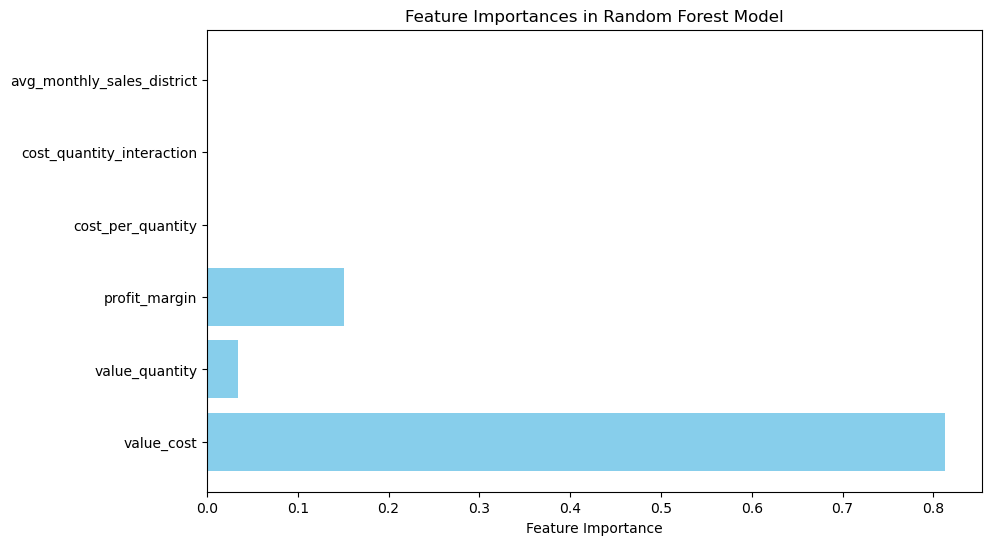

In [175]:
# Feature Importances for Random Forest
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importances
print("\nFeature Importances (Random Forest):")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Random Forest Model")
plt.show()

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Selecting only the features for which we want to check VIF
vif_data = df[["value_cost", "profit_margin"]]

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["feature"] = vif_data.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]

print(vif_df)

         feature       VIF
0     value_cost  1.000192
1  profit_margin  1.000192


## **4. Using "value_cost", "value_quantity", and "profit_margin" (Optimal Models)**

### **A. Linear Regression Model**

In [177]:
df = data.copy()

In [178]:
# Create interaction terms "profit_margin"
df["profit_margin"] = (df["value_sales"] - df["value_cost"]) / df["value_sales"]

In [179]:
# Select only numeric columns to apply the checks
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with 0 in numeric columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], 0)

# Fill any NaN values in numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

In [180]:
# Define independent and target variables for training and testing predictive models
X = df[["value_cost", "value_quantity", "profit_margin"]]
y = df["value_sales"]

In [181]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Linear Regression Evaluation
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

print("Linear Regression R-squared:", linear_r2)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression R-squared: 0.8141967833857624
Linear Regression MAE: 17.607800950888617
Linear Regression RMSE: 31.43729222361753


### **B. Random Forest Model**

In [182]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=48)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print("\nRandom Forest R-squared:", rf_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest R-squared: 0.9837740057150907
Random Forest MAE: 1.0953358301332208
Random Forest RMSE: 9.29018104031909


In [183]:
def mean_absolute_percentage_error(y_true, y_pred):
    # Create a mask for non-zero actual values
    non_zero_mask = y_true != 0
    
    # Calculate MAPE only for non-zero actual values
    return (np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]).mean()) * 100

# MAPE for Linear Regression
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print("Linear Regression MAPE:", mape_linear)

# MAPE for Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print("Random Forest MAPE:", mape_rf)

Linear Regression MAPE: 40.80496967663614
Random Forest MAPE: 19.819254344427353



Feature Importances (Random Forest):
value_cost: 0.8143
value_quantity: 0.0348
profit_margin: 0.1509


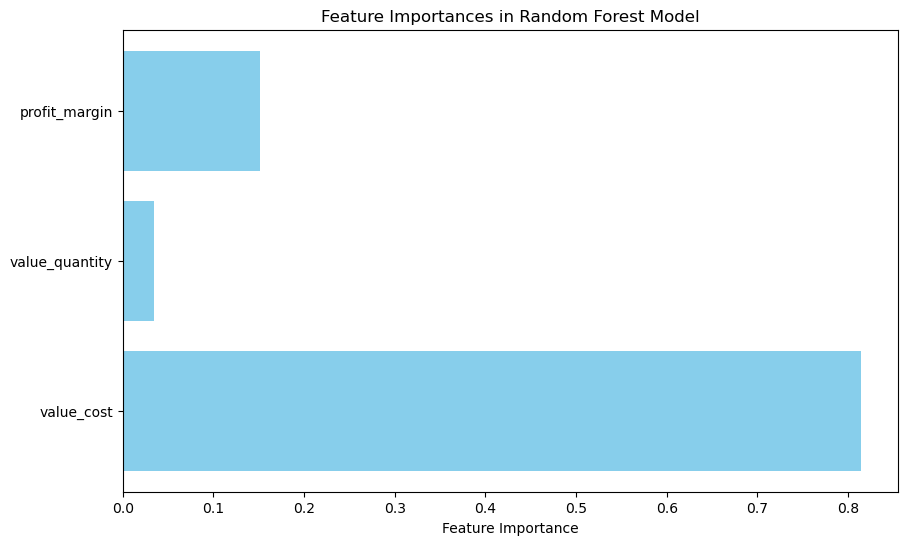

In [184]:
# Feature Importances for Random Forest
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importances
print("\nFeature Importances (Random Forest):")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Random Forest Model")
plt.show()

In [185]:
# Selecting features to check VIF
vif_data = df[["value_cost", "profit_margin"]]

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["feature"] = vif_data.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]

print(vif_df)

         feature       VIF
0     value_cost  1.000192
1  profit_margin  1.000192


### **C. Investigation of Products based on Profit Margin**

In [186]:
df = data.copy()

# Create interaction terms "profit_margin", "cost_per_quantity", and "cost_quantity_interaction"
df["profit_margin"] = (df["value_sales"] - df["value_cost"]) / df["value_sales"]

In [187]:
# Select only numeric columns to apply the checks
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with 0 in numeric columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], 0)

# Fill any NaN values in numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

In [188]:
# Group by brand and product category to calculate average profit margin and total sales
brand_category_analysis = df.groupby(["environment_group_code", "business_area_code"]).agg(
    avg_profit_margin=("profit_margin", "mean"),
    total_sales=("value_sales", "sum"),
    total_quantity=("value_quantity", "sum")
).reset_index()

# Sort by average profit margin in descending order
brand_category_analysis = brand_category_analysis.sort_values(by="avg_profit_margin", ascending=False)

# Display the top brands and product categories by profit margin
brand_category_analysis.head(10)

,environment_group_code,business_area_code,avg_profit_margin,total_sales,total_quantity
37,P,999,0.978191,8.898780e+03,26.0
21,I,DLT,0.848487,3.950000e+02,1.0
2,C,970,0.805471,8.548320e+03,2688.0
0,C,920,0.743580,1.154700e+03,23.0
91,Z,SAE,0.700218,1.415267e+03,8.0
15,C,TAL,0.688849,9.511673e+05,44471.0
22,I,IAE,0.686064,5.162591e+03,140.0
10,C,LCP,0.671844,2.962952e+05,26109.0
52,R,985,0.645600,5.300000e+02,2.0
11,C,LMP,0.632515,1.025611e+07,3345656.0


In [189]:
# Assuming df contains sales data with 'customer_district_code', 'value_sales', and 'profit_margin'
district_analysis = df.groupby('customer_district_code').agg(
    total_sales=('value_sales', 'sum'),
    avg_profit_margin=('profit_margin', 'mean'),
    total_quantity=('value_quantity', 'sum')
).reset_index()

# Sort the results to identify high-performing districts
district_analysis = district_analysis.sort_values(by='total_sales', ascending=False)

# Display the top districts by sales
district_analysis.head(10)

,customer_district_code,total_sales,avg_profit_margin,total_quantity
2,300,2.007135e+07,0.265049,2203577.750
0,200,1.971456e+07,0.549651,2280992.000
4,400,1.581542e+07,0.508505,1858128.400
13,600,8.290096e+06,0.546043,700333.000
6,500,7.567841e+06,0.556992,891852.000
5,410,3.667866e+06,0.556122,351685.000
1,210,3.161393e+06,0.569813,391199.000
11,540,2.987763e+06,0.378587,368093.275
3,310,1.734941e+06,0.565129,185217.000
9,530,1.468817e+06,0.463716,178993.308


## **5. Visualisations For Comparision of Model Performing Metrics**

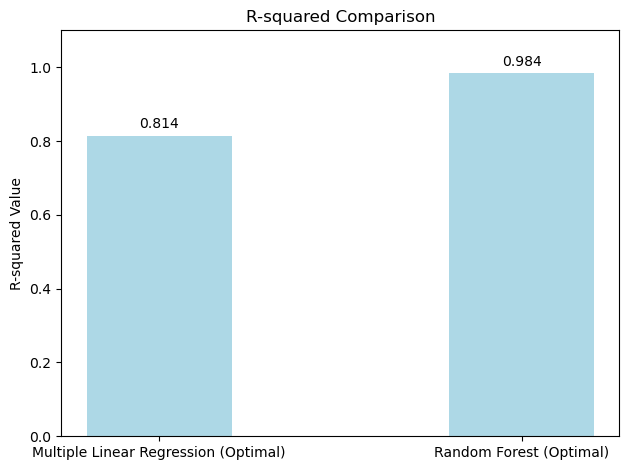

In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model metrics data focusing on key metrics
metrics_data = {
    "Model": ["Multiple Linear Regression (Optimal)", "Random Forest (Optimal)"],
    "R-squared": [0.814197, 0.983774],
    "MAE": [17.6078, 1.0953],
    "RMSE": [31.4373, 9.2902]
}

x = np.arange(len(metrics_df["Model"]))
bar_width = 0.4
metrics_df = pd.DataFrame(metrics_data)

# R-squared plot
plt.bar(x, metrics_df["R-squared"], width=bar_width, color='lightblue')
plt.title('R-squared Comparison')
plt.ylabel('R-squared Value')
plt.xticks(x, metrics_df["Model"])
plt.ylim(0, 1.1)  # Set y-axis limit to provide space above bars
for i, v in enumerate(metrics_df["R-squared"]):
    plt.text(i, v + 0.02, f"{v:.3f}", color='black', ha='center')
plt.tight_layout()
plt.show()

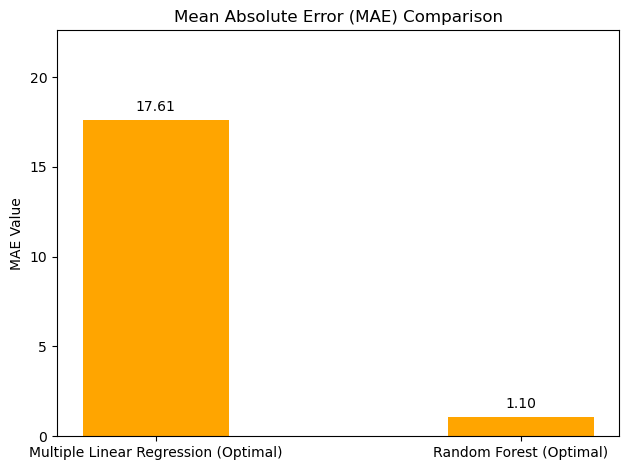

In [193]:
# MAE plot
plt.bar(x, metrics_df["MAE"], width=bar_width, color='orange')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE Value')
plt.xticks(x, metrics_df["Model"])
plt.ylim(0, max(metrics_df["MAE"]) + 5)  # Add space above the highest bar
for i, v in enumerate(metrics_df["MAE"]):
    plt.text(i, v + 0.5, f"{v:.2f}", color='black', ha='center')
plt.tight_layout()
plt.show()

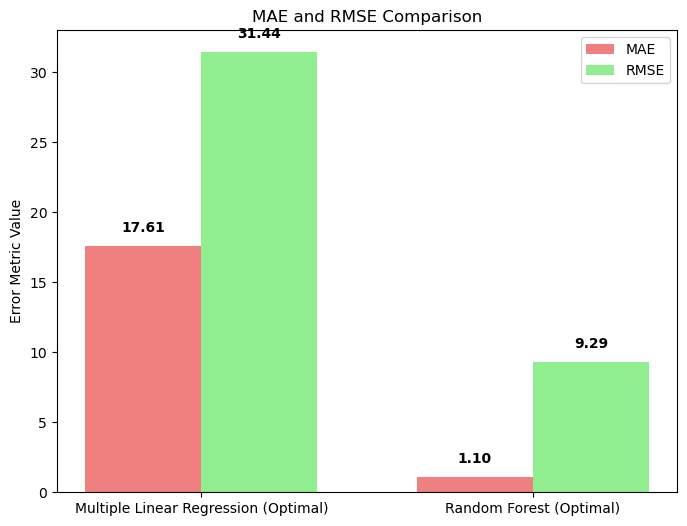

In [194]:
# Creating a single chart for MAE and RMSE with annotations
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width and positions for models
bar_width = 0.35
x = range(len(metrics_df["Model"]))

# Plotting MAE and RMSE side by side for each model
ax.bar([i - bar_width / 2 for i in x], metrics_df["MAE"], width=bar_width, label="MAE", color='lightcoral')
ax.bar([i + bar_width / 2 for i in x], metrics_df["RMSE"], width=bar_width, label="RMSE", color='lightgreen')

# Adding labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Error Metric Value")
ax.set_title("MAE and RMSE Comparison")
ax.legend()

# Annotating values for MAE and RMSE
for index, value in enumerate(metrics_df["MAE"]):
    ax.text(index - bar_width / 2, value + 1, f"{value:.2f}", ha='center', fontweight='bold', color='black')

for index, value in enumerate(metrics_df["RMSE"]):
    ax.text(index + bar_width / 2, value + 1, f"{value:.2f}", ha='center', fontweight='bold', color='black')

plt.show()

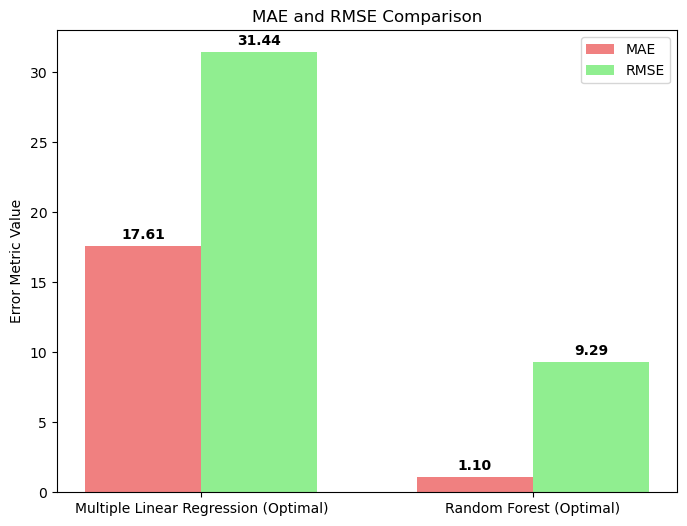

In [195]:
# Adjusting the annotation position for MAE and RMSE again to ensure all values are visible above the bars
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width and positions for models
bar_width = 0.35
x = range(len(metrics_df["Model"]))

# Plotting MAE and RMSE side by side for each model
ax.bar([i - bar_width / 2 for i in x], metrics_df["MAE"], width=bar_width, label="MAE", color='lightcoral')
ax.bar([i + bar_width / 2 for i in x], metrics_df["RMSE"], width=bar_width, label="RMSE", color='lightgreen')

# Adding labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Error Metric Value")
ax.set_title("MAE and RMSE Comparison")
ax.legend()

# Annotating values for MAE and RMSE with adjusted positions
for index, value in enumerate(metrics_df["MAE"]):
    ax.text(index - bar_width / 2, value + 0.5, f"{value:.2f}", ha='center', fontweight='bold', color='black')

for index, value in enumerate(metrics_df["RMSE"]):
    ax.text(index + bar_width / 2, value + 0.5, f"{value:.2f}", ha='center', fontweight='bold', color='black')

plt.show()

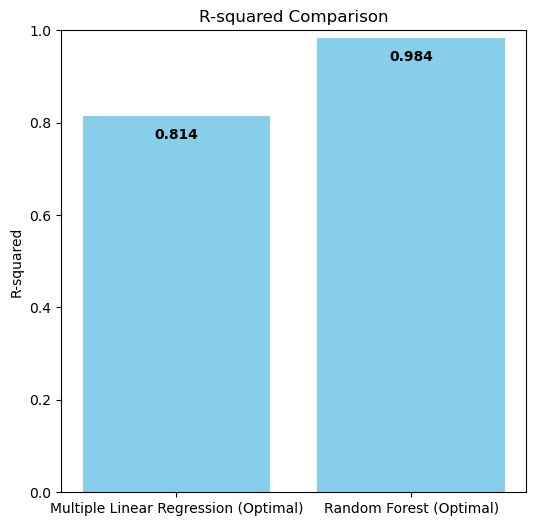

In [196]:
# Adjusting the annotation position to avoid overlap with the top border
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting R-squared comparison with adjusted y-axis
ax.bar(metrics_df["Model"], metrics_df["R-squared"], color='skyblue')
ax.set_title("R-squared Comparison")
ax.set_ylabel("R-squared")
ax.set_ylim(0, 1)  # Starting y-axis from 0

# Adding annotations with adjusted position for clarity
for index, value in enumerate(metrics_df["R-squared"]):
    ax.text(index, value - 0.05, f"{value:.3f}", ha='center', fontweight='bold', color='black')

plt.show()

# **Part 4 - Features Resulting in Likelihood of Losing Customers**

In [200]:
df = data.copy()

In [201]:
df.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date'],
      dtype='object')

We will define customer churn based on the absence of transactions over a specific period, **six (6) months**. This means customers who have not made any purchases since a particular cutoff date will be marked as churned.

Create the necessary features that may influence customer churn:
1. Recency: The time since the last purchase.
2. Frequency: The number of purchases made in the last year.
3. Monetary Value: Total sales from each customer in the last year.
4. Time Gap: Difference between the order date and the invoice date.

In [202]:
# Define the churn cutoff date (6 months from the last order)
churn_cutoff_date = df['order_date'].max() - pd.DateOffset(months=6)

# Create a churn indicator
df['churn'] = (df['order_date'] < churn_cutoff_date).astype(int)

# Calculate Recency, Frequency, and Monetary Value
recency_df = df.groupby('customer_code').agg(
    recency=('order_date', lambda x: (churn_cutoff_date - x.max()).days),
    frequency=('order_date', 'count'),
    monetary=('value_sales', 'sum')
).reset_index()

# Merge the churn indicator with recency_df
recency_df = recency_df.merge(df[['customer_code', 'churn']].drop_duplicates(), on='customer_code', how='left')

# Verify the new features
print(recency_df.head())

  customer_code  recency  frequency  monetary  churn
0     100050100     -116          6    -98.39      1
1     100050100     -116          6    -98.39      0
2     100210100     -144         11   1157.70      1
3     100210100     -144         11   1157.70      0
4     100250200     -144          1     62.20      0


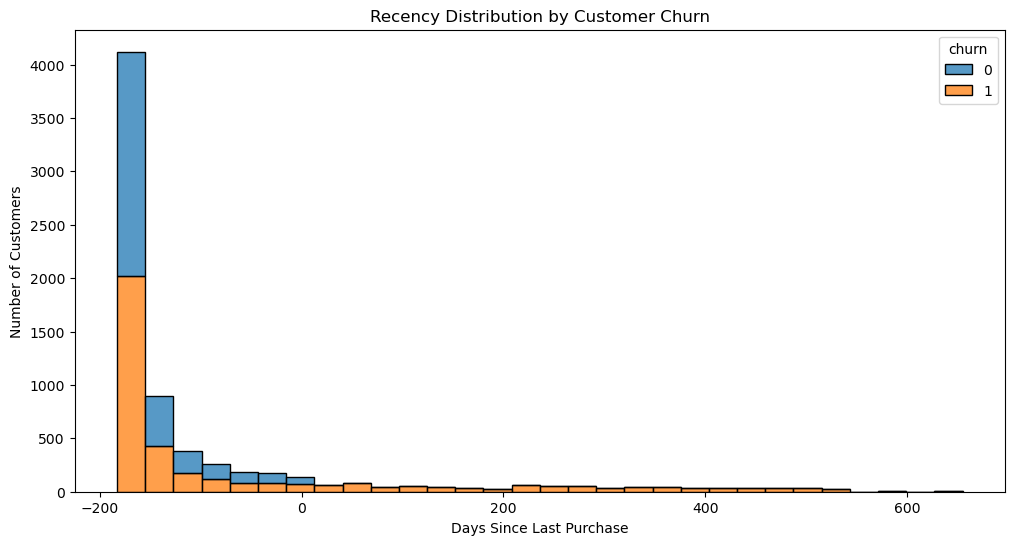

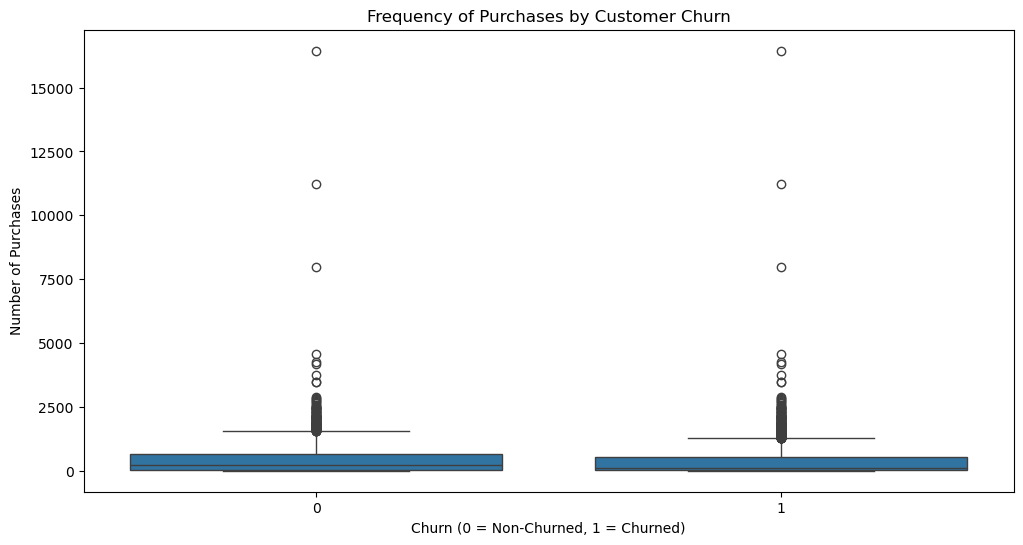

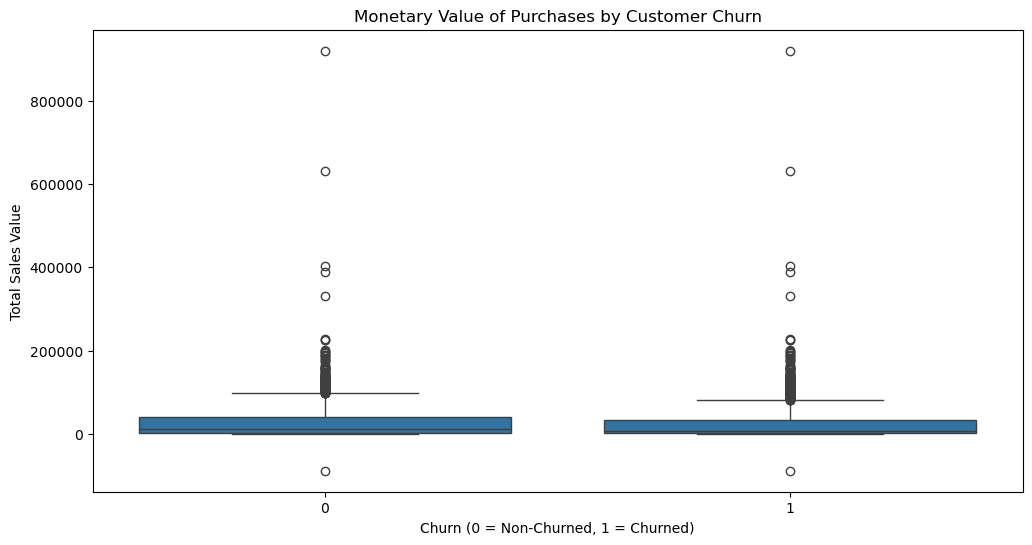

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Recency
plt.figure(figsize=(12, 6))
sns.histplot(data=recency_df, x='recency', hue='churn', multiple='stack', bins=30)
plt.title('Recency Distribution by Customer Churn')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Visualize Frequency
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='frequency', data = recency_df)
plt.title('Frequency of Purchases by Customer Churn')
plt.xlabel('Churn (0 = Non-Churned, 1 = Churned)')
plt.ylabel('Number of Purchases')
plt.show()

# Visualize Monetary Value
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='monetary', data=recency_df)
plt.title('Monetary Value of Purchases by Customer Churn')
plt.xlabel('Churn (0 = Non-Churned, 1 = Churned)')
plt.ylabel('Total Sales Value')
plt.show()

In [204]:
from scipy import stats

# Recency T-Test
recency_churned = recency_df[recency_df['churn'] == 1]['recency']
recency_non_churned = recency_df[recency_df['churn'] == 0]['recency']
t_stat, p_value = stats.ttest_ind(recency_churned, recency_non_churned, equal_var=False)

print(f'Recency T-Test: t-statistic = {t_stat}, p-value = {p_value}')

# Frequency T-Test
frequency_churned = recency_df[recency_df['churn'] == 1]['frequency']
frequency_non_churned = recency_df[recency_df['churn'] == 0]['frequency']
t_stat, p_value = stats.ttest_ind(frequency_churned, frequency_non_churned, equal_var=False)

print(f'Frequency T-Test: t-statistic = {t_stat}, p-value = {p_value}')

# Monetary T-Test
monetary_churned = recency_df[recency_df['churn'] == 1]['monetary']
monetary_non_churned = recency_df[recency_df['churn'] == 0]['monetary']
t_stat, p_value = stats.ttest_ind(monetary_churned, monetary_non_churned, equal_var=False)

print(f'Monetary T-Test: t-statistic = {t_stat}, p-value = {p_value}')

Recency T-Test: t-statistic = 28.613589820117607, p-value = 6.310927569342648e-165
Frequency T-Test: t-statistic = -4.421135138268699, p-value = 9.97472868789711e-06
Monetary T-Test: t-statistic = -4.569282392428799, p-value = 4.982405243838936e-06


In [205]:
# Define refund codes
refund_codes = ['CRR', 'CRD', 'COP', 'CPR', 'CRP', 'ZCG', 'ZCR', 'WDC', 'CDG']

# Function to calculate refund amount
def calculate_refund_amount(row):
    if row['order_type_code'] in refund_codes:
        return row['value_sales']
    else:
        return 0

# Create a refund amount column
df['refund_amount'] = df.apply(calculate_refund_amount, axis=1)

# Aggregate refund data at the customer level
refund_summary = df.groupby('customer_code').agg(
    total_refunds=('refund_amount', 'sum'),
).reset_index()

# Count the number of refunds
refund_summary['num_refunds'] = df[df['order_type_code'].isin(refund_codes)].groupby('customer_code')['refund_amount'].count().reset_index(drop=True)

# Merge the refund summary with the main dataframe
df = df.merge(refund_summary, on='customer_code', how='left')

# Fill NaN values with 0 (no refunds)
df['total_refunds'] = df['total_refunds'].fillna(0)
df['num_refunds'] = df['num_refunds'].fillna(0)

In [206]:
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert order_date to datetime

# Calculate Recency, Frequency, and Monetary values
current_date = df['order_date'].max()  # Use the latest order date for recency calculation

# Create a customer-level summary for RFM
rfm_summary = df.groupby('customer_code').agg(
    recency=('order_date', lambda x: (current_date - x.max()).days),
    frequency=('order_date', 'count'),  # Count the number of purchases
    monetary=('value_sales', 'sum')  # Sum of sales value
).reset_index()

# Merge RFM summary with the main DataFrame (if needed)
df = df.merge(rfm_summary, on='customer_code', how='left')

In [207]:
df['time_gap'] = (df['invoice_date'] - df['order_date']).dt.days

In [208]:
# Assuming you have already computed the 'time_gap' feature
# Define features and target including the new feature
X = df[['recency', 'frequency', 'monetary', 'total_refunds', 'num_refunds', 'time_gap']]
y = df['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Prediction Models on Churns, Using Default Parameters**

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate models
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     65253
           1       0.77      1.00      0.87    212679

    accuracy                           0.77    277932
   macro avg       0.38      0.50      0.43    277932
weighted avg       0.59      0.77      0.66    277932



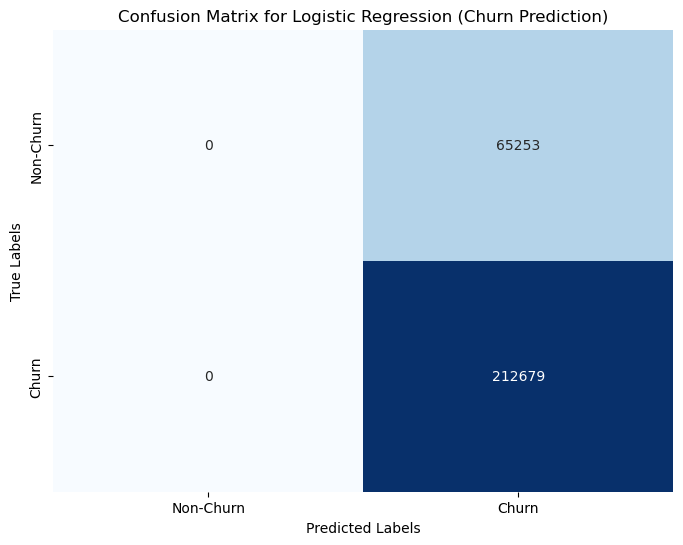

In [210]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define custom labels for the confusion matrix
labels = ['Non-Churn', 'Churn']

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression (Churn Prediction)')
plt.show()

In [211]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.65      0.12      0.21     65253
           1       0.78      0.98      0.87    212679

    accuracy                           0.78    277932
   macro avg       0.72      0.55      0.54    277932
weighted avg       0.75      0.78      0.71    277932



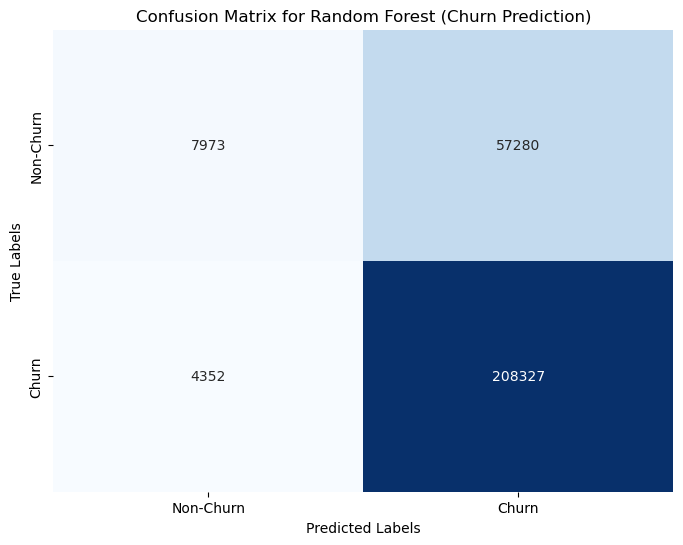

In [212]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Define custom labels for churn vs. non-churn
labels = ['Non-Churn', 'Churn']

# Visualize the Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest (Churn Prediction)')
plt.show()

#### **Select Importnnt Features**

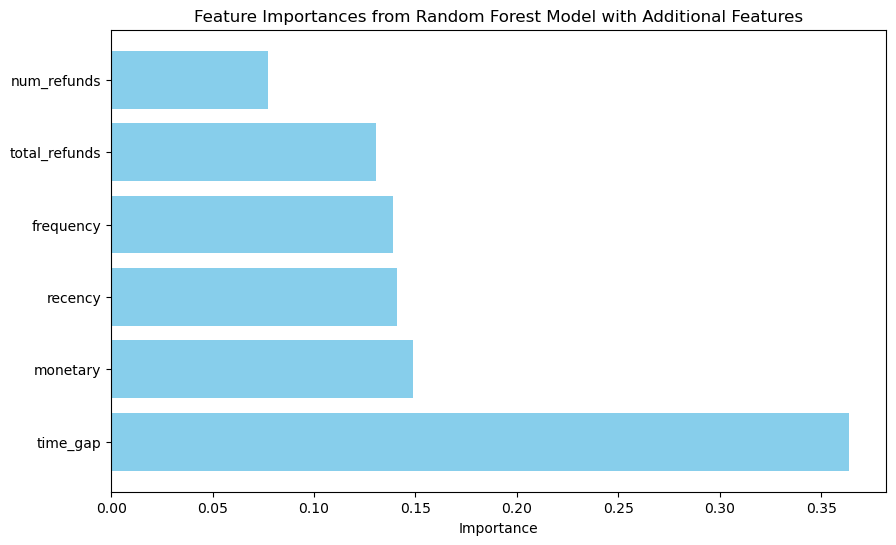

In [213]:
# Feature importances from Random Forest
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model with Additional Features')
plt.show()

Class Distribution:
 churn
1    1065966
0     323694
Name: count, dtype: int64


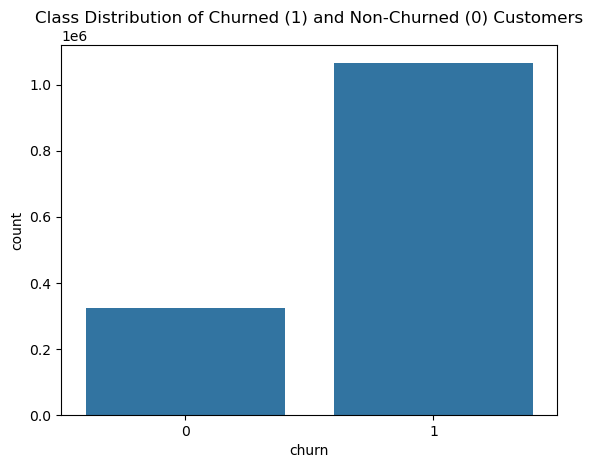

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target column named 'churn'
# Check class distribution
class_counts = df['churn'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot the class distribution
sns.countplot(x='churn', data=df)
plt.title("Class Distribution of Churned (1) and Non-Churned (0) Customers")
plt.show()

## **Logistic Regression Model - Using Balanced Class Weight**

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into features and target variable
X = df[['recency', 'frequency', 'monetary', 'total_refunds', 'num_refunds', 'time_gap']]
y = df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Initialize and fit logistic regression with balanced class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=78, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Non-Churned', 'Churned']))

Classification Report:
               precision    recall  f1-score   support

 Non-Churned       0.24      0.83      0.38     64758
     Churned       0.81      0.23      0.35    213174

    accuracy                           0.37    277932
   macro avg       0.53      0.53      0.37    277932
weighted avg       0.68      0.37      0.36    277932



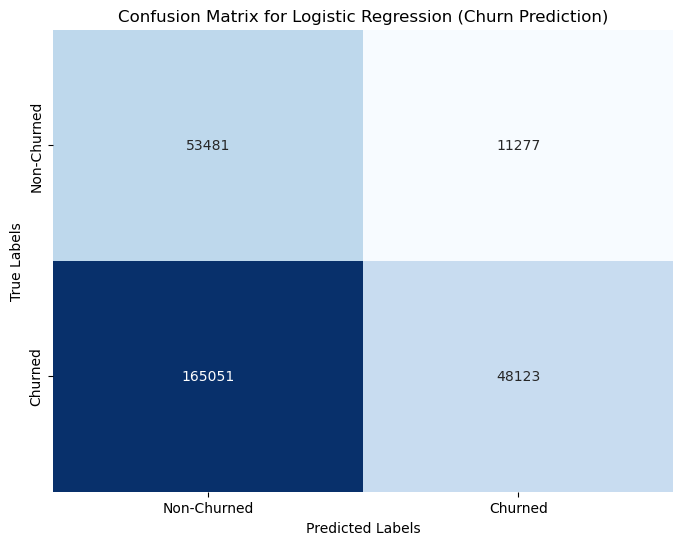

In [216]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define custom labels for the confusion matrix
labels = ['Non-Churned', 'Churned']

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression (Churn Prediction)')
plt.show()

## **Logistic Regression, Applying RandomUnderSampler**

In [217]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to balance classes in the training set only
undersampler = RandomUnderSampler(random_state=78)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution after undersampling
print("Class Distribution After Undersampling:\n", pd.Series(y_resampled).value_counts())

# Train logistic regression on the undersampled data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Predict on the test set (not undersampled) to evaluate performance
y_pred = log_reg.predict(X_test)
print("Classification Report After Undersampling:\n", classification_report(y_test, y_pred, target_names=['Non-Churned', 'Churned']))

Class Distribution After Undersampling:
 churn
0    258936
1    258936
Name: count, dtype: int64
Classification Report After Undersampling:
               precision    recall  f1-score   support

 Non-Churned       0.25      0.10      0.14     64758
     Churned       0.77      0.91      0.83    213174

    accuracy                           0.72    277932
   macro avg       0.51      0.50      0.49    277932
weighted avg       0.65      0.72      0.67    277932



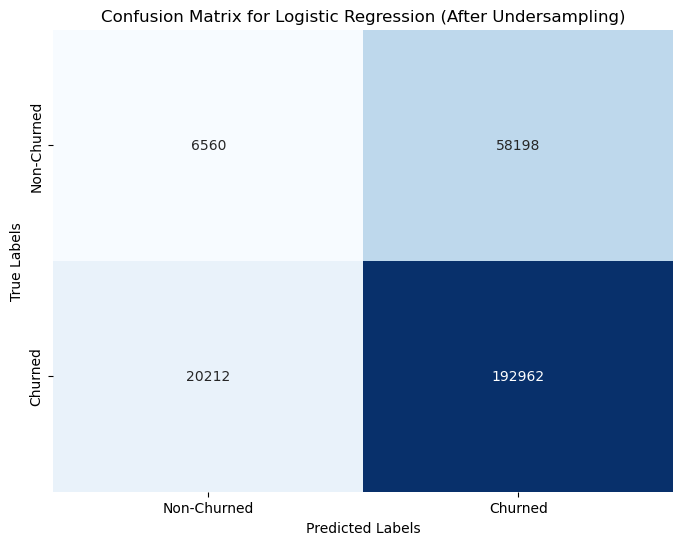

In [218]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define custom labels for the confusion matrix
labels = ['Non-Churned', 'Churned']

# Visualize the Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression (After Undersampling)')
plt.show()

## **Logistic Regression Model - Lowering Detecting Threshold to 0.4**

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

 Non-Churned       0.22      0.00      0.00     64758
     Churned       0.77      1.00      0.87    213174

    accuracy                           0.77    277932
   macro avg       0.49      0.50      0.43    277932
weighted avg       0.64      0.77      0.67    277932



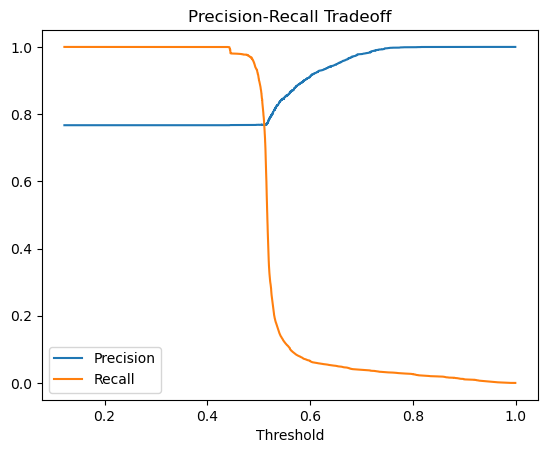

In [219]:
from sklearn.metrics import precision_recall_curve

# Get probabilities instead of binary predictions
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Adjust threshold - e.g., lowering it slightly to 0.4 instead of the default 0.5
threshold = 0.4
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Evaluate with the adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted, target_names=['Non-Churned', 'Churned']))

# Plot precision-recall curve to choose an optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=1)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall Tradeoff")
plt.show()

# **End of Section 1, 4, 5, 6 of the Group Project**